### EXPLORATORY DATA ANALYSIS

#### Import Libraries

In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from matplotlib.ticker import ScalarFormatter
%matplotlib inline
import os
from functools import reduce

In [2]:
# Print the current working directory
print("Previous working directory: {0}".format(os.getcwd()))
# Change the current working directory
os.chdir('C:\\Users\\Richard\\Downloads\\Data')
# Print the current working directory
print("Current working directory: {0}".format(os.getcwd()))

Previous working directory: C:\Users\Richard
Current working directory: C:\Users\Richard\Downloads\Data


#### Loading data with pandas

In [3]:
#reading our data
df=pd.read_csv('client_data.csv')
df1=pd.read_csv('price_data.csv')

#### Data Types

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  float64
 12  forecast_meter_rent_12m         

### Feature engineering
creating a new feature <b>contract_yrs</b> as i believe it might be an important variables related to churn

In [5]:
#converting our time data to datetime datatype
df['date_activ'] = pd.to_datetime(df['date_activ'])
df['date_end'] = pd.to_datetime(df['date_end'])


In [6]:
#numbers of years between start and end of contract
df['contract_yrs'] = (((df['date_end'] - df['date_activ']).dt.days)/365).round(0)


In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  193002 non-null  object 
 1   price_date          193002 non-null  object 
 2   price_off_peak_var  193002 non-null  float64
 3   price_peak_var      193002 non-null  float64
 4   price_mid_peak_var  193002 non-null  float64
 5   price_off_peak_fix  193002 non-null  float64
 6   price_peak_fix      193002 non-null  float64
 7   price_mid_peak_fix  193002 non-null  float64
dtypes: float64(6), object(2)
memory usage: 11.8+ MB


#### Statistics

In [8]:
#summary statistics of client data
df.describe()

cons_12m  cons_gas_12m  cons_last_month  forecast_cons_12m  \
count  1.460600e+04  1.460600e+04     14606.000000       14606.000000   
mean   1.592203e+05  2.809238e+04     16090.269752        1868.614880   
std    5.734653e+05  1.629731e+05     64364.196422        2387.571531   
min    0.000000e+00  0.000000e+00         0.000000           0.000000   
25%    5.674750e+03  0.000000e+00         0.000000         494.995000   
50%    1.411550e+04  0.000000e+00       792.500000        1112.875000   
75%    4.076375e+04  0.000000e+00      3383.000000        2401.790000   
max    6.207104e+06  4.154590e+06    771203.000000       82902.830000   

       forecast_cons_year  forecast_discount_energy  forecast_meter_rent_12m  \
count        14606.000000              14606.000000             14606.000000   
mean          1399.762906                  0.966726                63.086871   
std           3247.786255                  5.108289                66.165783   
min              0.000000                  0.000000                 0.000000   
25%              0.000000                  0.000000                16.180000   
50%            314.000000                  0.000000                18.795000   
75%           1745.750000                  0.000000               131.030000   
max         175375.000000                 30.000000               599.310000   

       forecast_price_energy_off_peak  forecast_price_energy_peak  \
count                    14606.000000                14606.000000   
mean                         0.137283                    0.050491   
std                          0.024623                    0.049037   
min                          0.000000                    0.000000   
25%                          0.116340                    0.000000   
50%                          0.143166                    0.084138   
75%                          0.146348                    0.098837   
max                          0.273963                    0.195975   

       forecast_price_pow_off_peak      imp_cons  margin_gross_pow_ele  \
count                 14606.000000  14606.000000          14606.000000   
mean                     43.130056    152.786896             24.565121   
std                       4.485988    341.369366             20.231172   
min                       0.000000      0.000000              0.000000   
25%                      40.606701      0.000000             14.280000   
50%                      44.311378     37.395000             21.640000   
75%                      44.311378    193.980000             29.880000   
max                      59.266378  15042.790000            374.640000   

       margin_net_pow_ele   nb_prod_act    net_margin  num_years_antig  \
count        14606.000000  14606.000000  14606.000000     14606.000000   
mean            24.562517      1.292346    189.264522         4.997809   
std             20.230280      0.709774    311.798130         1.611749   
min              0.000000      1.000000      0.000000         1.000000   
25%             14.280000      1.000000     50.712500         4.000000   
50%             21.640000      1.000000    112.530000         5.000000   
75%             29.880000      1.000000    243.097500         6.000000   
max            374.640000     32.000000  24570.650000        13.000000   

            pow_max         churn  contract_yrs  
count  14606.000000  14606.000000  14606.000000  
mean      18.135136      0.097152      5.493907  
std       13.534743      0.296175      1.664190  
min        3.300000      0.000000      2.000000  
25%       12.500000      0.000000      4.000000  
50%       13.856000      0.000000      5.000000  
75%       19.172500      0.000000      6.000000  
max      320.000000      1.000000     13.000000

In [9]:
#Summary statistics of the price data
df1.describe()

price_off_peak_var  price_peak_var  price_mid_peak_var  \
count       193002.000000   193002.000000       193002.000000   
mean             0.141027        0.054630            0.030496   
std              0.025032        0.049924            0.036298   
min              0.000000        0.000000            0.000000   
25%              0.125976        0.000000            0.000000   
50%              0.146033        0.085483            0.000000   
75%              0.151635        0.101673            0.072558   
max              0.280700        0.229788            0.114102   

       price_off_peak_fix  price_peak_fix  price_mid_peak_fix  
count       193002.000000   193002.000000       193002.000000  
mean            43.334477       10.622875            6.409984  
std              5.410297       12.841895            7.773592  
min              0.000000        0.000000            0.000000  
25%             40.728885        0.000000            0.000000  
50%             44.266930        0.000000            0.000000  
75%             44.444710       24.339581           16.226389  
max             59.444710       36.490692           17.458221

In [10]:
#giving the chart a style
sns.set_style('darkgrid')

In [11]:
#Displaying the Client dataframe to get any idea of the data
df.head()

id                     channel_sales  \
0  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
1  d29c2c54acc38ff3c0614d0a653813dd                           MISSING   
2  764c75f661154dac3a6c254cd082ea7d  foosdfpfkusacimwkcsosbicdxkicaua   
3  bba03439a292a1e166f80264c16191cb  lmkebamcaaclubfxadlmueccxoimlema   
4  149d57cf92fc41cf94415803a877cb4b                           MISSING   

   cons_12m  cons_gas_12m  cons_last_month date_activ   date_end  \
0         0         54946                0 2013-06-15 2016-06-15   
1      4660             0                0 2009-08-21 2016-08-30   
2       544             0                0 2010-04-16 2016-04-16   
3      1584             0                0 2010-03-30 2016-03-30   
4      4425             0              526 2010-01-13 2016-03-07   

  date_modif_prod date_renewal  forecast_cons_12m  ...  imp_cons  \
0      2015-11-01   2015-06-23               0.00  ...      0.00   
1      2009-08-21   2015-08-31             189.95  ...      0.00   
2      2010-04-16   2015-04-17              47.96  ...      0.00   
3      2010-03-30   2015-03-31             240.04  ...      0.00   
4      2010-01-13   2015-03-09             445.75  ...     52.32   

   margin_gross_pow_ele  margin_net_pow_ele  nb_prod_act  net_margin  \
0                 25.44               25.44            2      678.99   
1                 16.38               16.38            1       18.89   
2                 28.60               28.60            1        6.60   
3                 30.22               30.22            1       25.46   
4                 44.91               44.91            1       47.98   

   num_years_antig                         origin_up  pow_max  churn  \
0                3  lxidpiddsbxsbosboudacockeimpuepw   43.648      1   
1                6  kamkkxfxxuwbdslkwifmmcsiusiuosws   13.800      0   
2                6  kamkkxfxxuwbdslkwifmmcsiusiuosws   13.856      0   
3                6  kamkkxfxxuwbdslkwifmmcsiusiuosws   13.200      0   
4                6  kamkkxfxxuwbdslkwifmmcsiusiuosws   19.800      0   

   contract_yrs  
0           3.0  
1           7.0  
2           6.0  
3           6.0  
4           6.0  

[5 rows x 27 columns]

In [12]:
#Displaying the Price dataframe to get any idea of the data
df1.head()

id  price_date  price_off_peak_var  \
0  038af19179925da21a25619c5a24b745  2015-01-01            0.151367   
1  038af19179925da21a25619c5a24b745  2015-02-01            0.151367   
2  038af19179925da21a25619c5a24b745  2015-03-01            0.151367   
3  038af19179925da21a25619c5a24b745  2015-04-01            0.149626   
4  038af19179925da21a25619c5a24b745  2015-05-01            0.149626   

   price_peak_var  price_mid_peak_var  price_off_peak_fix  price_peak_fix  \
0             0.0                 0.0           44.266931             0.0   
1             0.0                 0.0           44.266931             0.0   
2             0.0                 0.0           44.266931             0.0   
3             0.0                 0.0           44.266931             0.0   
4             0.0                 0.0           44.266931             0.0   

   price_mid_peak_fix  
0                 0.0  
1                 0.0  
2                 0.0  
3                 0.0  
4                 0.0

In [13]:
#Creating a column that represent the churn value 1 for Yes and for No
df['churn_1'] = np.where(df['churn'] == 1,'Churn','Retention')

#Dataframe for numbers of churned and non_churned
no_churn = pd.DataFrame(df['churn_1'].value_counts().reset_index())
no_churn

index  churn_1
0  Retention    13187
1      Churn     1419

### Data Visualization
lets explore the relationship of our varibale Churn with other variables in the dataset

### Churn

In [14]:
#plotting a pie chart for the proportion of churned and retain clients
fig=px.pie(data_frame=no_churn,names='index',values='churn_1',title='Percentage of Retained and Churned Clients')

#positioning the chart title
fig.update_layout(title_x=0.5,title_y=0.96)
fig.show()


Just 9.72% of PowerCo Clients cancelled or failed to renew their contract 

### Sales Channel

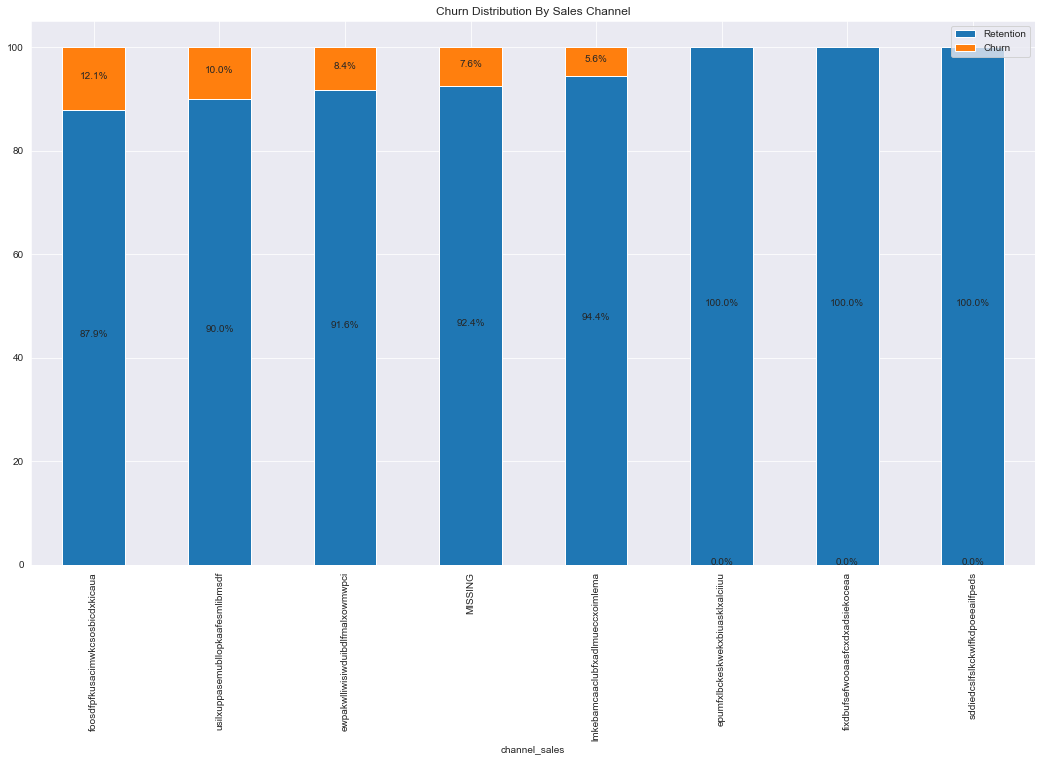

In [15]:
#creating a dataframe that groups by channel and gets the count for each churn categorical variable
channel = df.groupby('channel_sales')['churn'].value_counts().unstack(fill_value=0)

#getting the percentage value of churn value for each sales channel
channel_churn = (channel.div(channel.sum(axis=1),axis=0).sort_values(by=[1],ascending=False)*100)

#plotting a stacked bar of churned and retained customer
ax = channel_churn.plot(kind='bar',stacked=True,figsize=(18,10));

#changing the positions of x_ticks labels
plt.xticks(rotation=90);

#renaming our legends name
plt.legend(['Retention','Churn']);

#chart title
plt.title('Churn Distribution By Sales Channel')
          
# Add labels to the stacked bars
for p in ax.patches: #iterate through individual patches in the chart(p.s. each bar contains patches)
    width, height = p.get_width(), p.get_height() #getting the height and width of each patches
    x, y = p.get_xy() #gets the coordinate of the lower left corner of the patch
    ax.annotate(f'{height:.1f}%', (x + width / 2, y + height / 2), ha='center') #sets the position of the label at the center of the bar segment. 

plt.show()

The above bar chart shows the percentage of those who churned using a particular sales channel.
<br>
As well as this, the value of MISSING has a churn rate of 7.6%. MISSING indicates a missing value and was added by the team when they were cleaning the dataset. This feature could be an important feature when it comes to building our model.

#### Creating a stacked bar plot function

In [16]:
## A stacked bar function
def stacked_bar(df,title,figsize):
    ax = df.plot(kind='bar',stacked=True,figsize=figsize)
    plt.legend(['Retention','Churn'])
    plt.title(title)
    for p in ax.patches:
        width,height = p.get_width(),p.get_height()
        x,y=p.get_xy()
        ax.annotate(f'{height:.0f}',(x+width/2,y+height/2), ha='center')
plt.show()

### Gas client

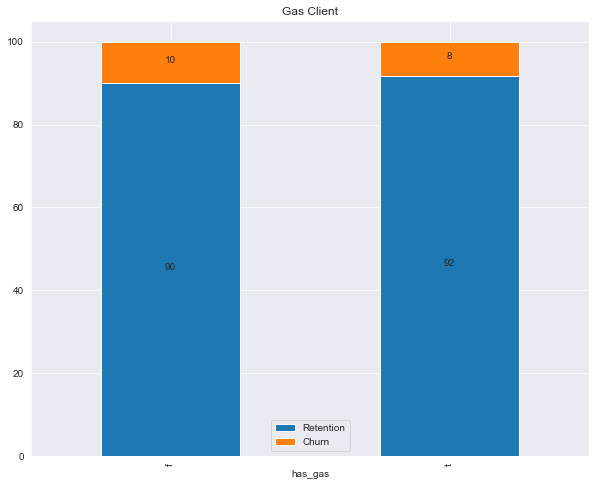

In [17]:
has_gas =df.groupby('has_gas')['churn'].value_counts().unstack(fill_value=0)
has_gas_churn=(has_gas.div(has_gas.sum(axis=1),axis=0)*100)
stacked_bar(has_gas_churn,'Gas Client',(10,8))

The percentage of customers who churned is higher among those without gas service, at 10%, compared to 8% for those with gas service.

### Consumption

#### Lets take a look at the average consumption of Power and Energy Between Churned and Retained Clients

In [18]:
#grouping our dataframe by churn nd find the mean values of energy and power consumptions
mean_values = df.groupby('churn').mean()[['cons_12m','cons_gas_12m','cons_last_month']].transpose()
mean_values_1 = (mean_values.div(mean_values.sum(axis=1),axis=0).sort_values(by=[1],ascending=False)*100)
mean_values

churn                        0             1
cons_12m         167867.266550  78862.478506
cons_gas_12m      30121.497308   9235.411557
cons_last_month   17046.352089   7205.239605

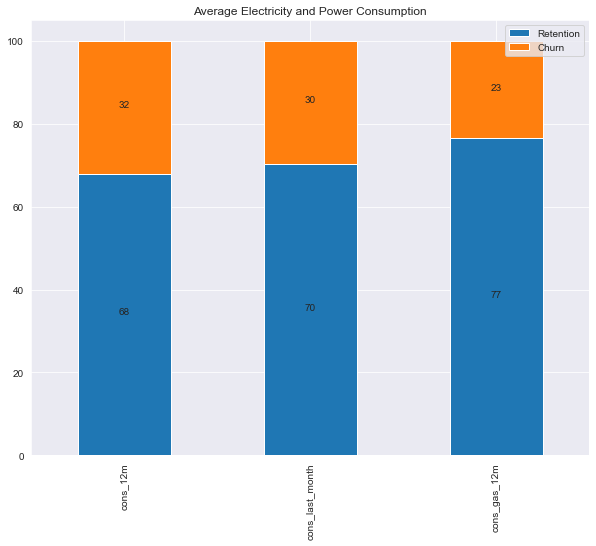

In [19]:
stacked_bar(mean_values_1,'Average Electricity and Power Consumption',(10,8))

On average, the customers who churned tend to have lower electricity consumption in the last month and 12 months, as well as lower gas consumption in the last 12 months.
<br>
i.e Over 30% of churner across electricity and gas consumptions

In [20]:
consumption = df[['id', 'cons_12m', 'cons_gas_12m', 'cons_last_month', 'imp_cons', 'has_gas', 'churn']]
consumption.head(1)

id  cons_12m  cons_gas_12m  cons_last_month  \
0  24011ae4ebbe3035111d65fa7c15bc57         0         54946                0   

   imp_cons has_gas  churn  
0       0.0       t      1

Let's see the distribution of the consumption in the last year and month. Since the consumption data is univariate, let's use histograms to visualize their distribution.

In [21]:
#Creating a distribution plot function
def plot_distribution(dataframe,column,ax,bins=50):
    temp = pd.DataFrame({'Retention': dataframe[dataframe['churn']==0][column],
                        'Churn': dataframe[dataframe['churn']==1][column]})
    temp[['Retention','Churn']].plot(kind='hist',bins=bins,ax=ax,stacked=True)
    ax.set_xlabel(column)
    # Change the x-axis to plain style
    ax.ticklabel_format(style='plain', axis='x')
plt.show()

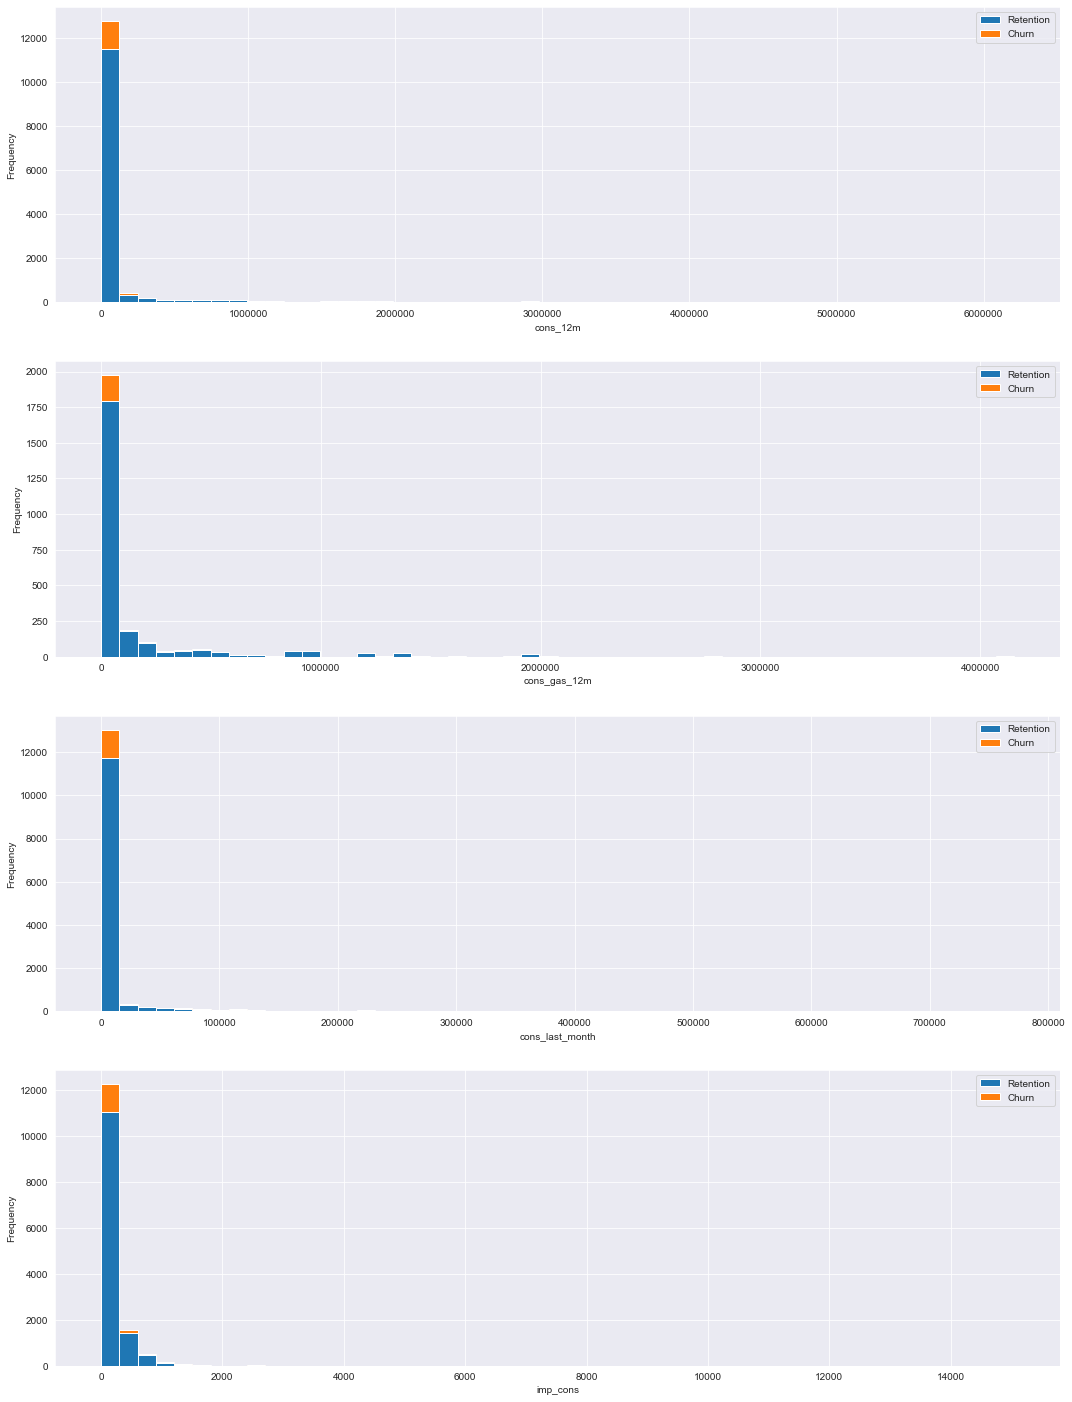

In [22]:
fig,axs=plt.subplots(nrows=4,figsize=(18,25))

plot_distribution(consumption,'cons_12m',axs[0])
plot_distribution(consumption[consumption['has_gas'] == 't'], 'cons_gas_12m', axs[1])
plot_distribution(consumption, 'cons_last_month', axs[2])
plot_distribution(consumption, 'imp_cons', axs[3])

Clearly, the consumption data is highly positively skewed, presenting a very long right-tail towards the higher values of the distribution. The values on the higher and lower end of the distribution are likely to be outliers. We can use a standard plot to visualise the outliers in more detail. A boxplot is a standardized way of displaying the distribution based on a five number summary:
- Minimum
- First quartile (Q1)
- Median
- Third quartile (Q3)
- Maximum

It can reveal outliers and what their values are. It can also tell us if our data is symmetrical, how tightly our data is grouped and if/how our data is skewed.

C:\Users\Richard\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\Richard\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\Richard\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\Richard\anaconda3\lib\site-packages\seaborn\_decorators.py:36

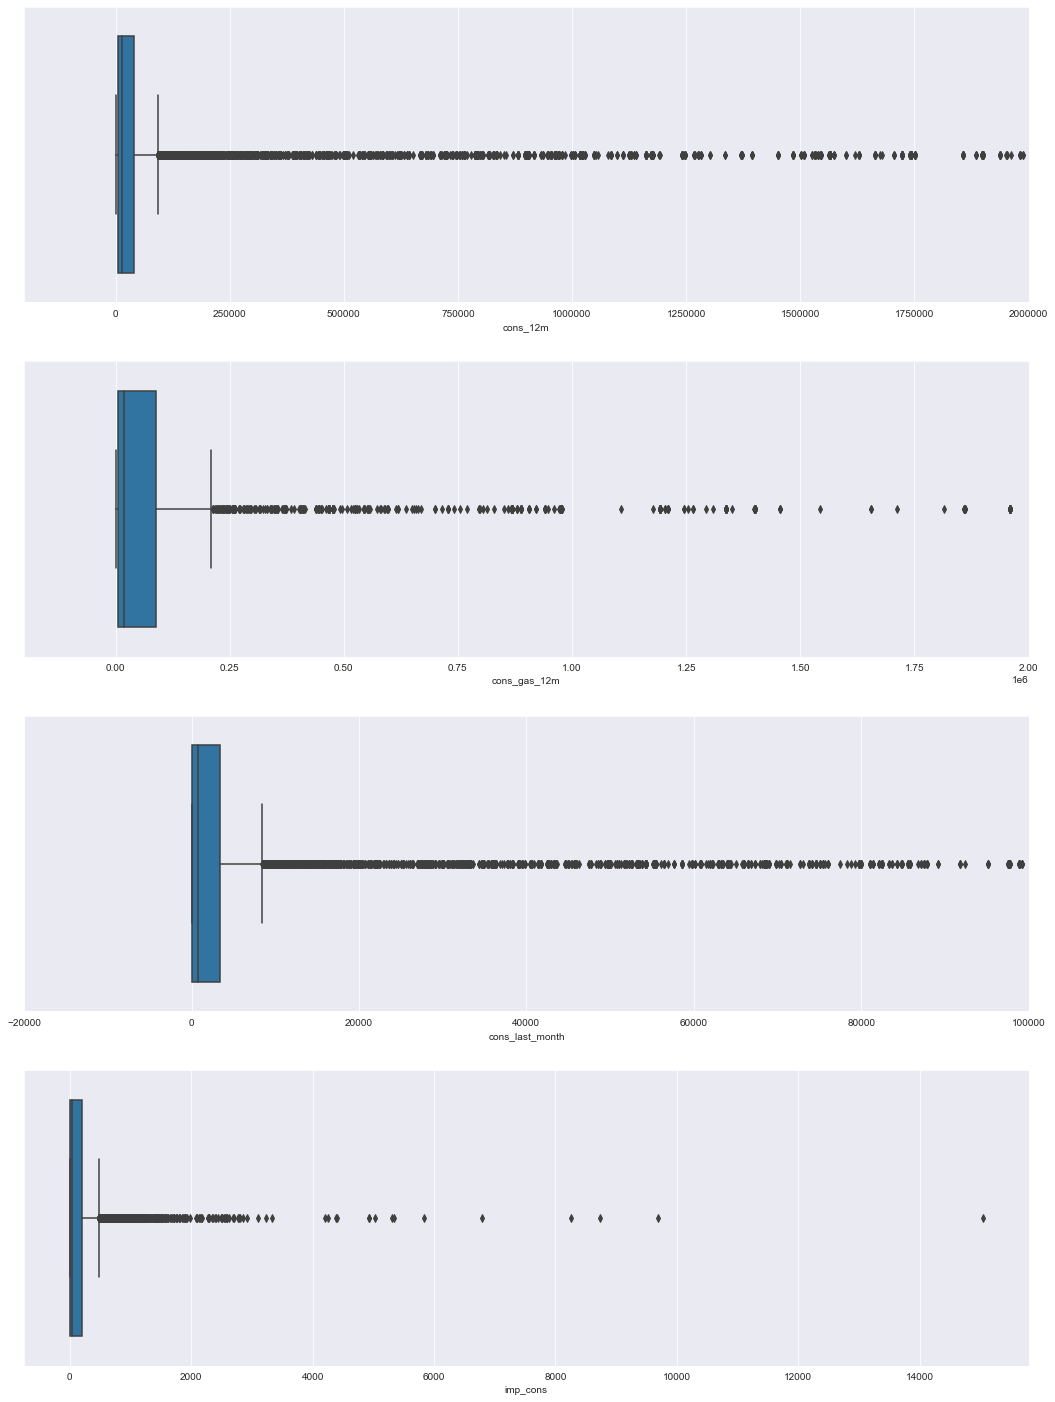

In [23]:
fig, axs = plt.subplots(nrows=4, figsize=(18,25))

# Plot Boxplot
sns.boxplot(consumption["cons_12m"], ax=axs[0])
sns.boxplot(consumption[consumption["has_gas"] == "t"]["cons_gas_12m"], ax=axs[1])
sns.boxplot(consumption["cons_last_month"], ax=axs[2])
sns.boxplot(consumption["imp_cons"], ax=axs[3])


# Remove scientific notation
for ax in axs:
    ax.ticklabel_format(style='plain', axis='x')
    # Set x-axis limit
    axs[0].set_xlim(-200000, 2000000)
    axs[1].set_xlim(-200000, 2000000)
    axs[2].set_xlim(-20000, 100000)
    plt.show()

Our Features contains outliers and its skewed

### Contract 

In [24]:
contract = df.groupby('contract_yrs')['churn'].value_counts().unstack(fill_value=0)
contract_churn =  (contract.div(contract.sum(axis=1),0)).sort_values(by=[1],ascending=False)*100
contract_churn

churn                  0          1
contract_yrs                       
3.0            85.687204  14.312796
4.0            87.304688  12.695312
5.0            89.945280  10.054720
12.0           90.070922   9.929078
13.0           91.111111   8.888889
7.0            92.450286   7.549714
6.0            92.514620   7.485380
8.0            92.622951   7.377049
11.0           95.652174   4.347826
9.0            97.333333   2.666667
10.0           97.727273   2.272727
2.0           100.000000   0.000000

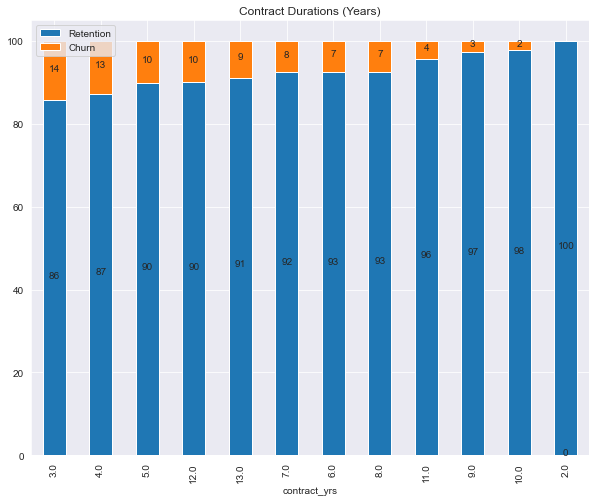

In [25]:
stacked_bar(contract_churn,'Contract Durations (Years)',(10,8))

Client with 3yrs contract, over 14% of them churned as  to other contract durations types. Only Clientas with 2yrs contract didnt register any churners

### Forecast

In [26]:
forecast = df[
    ["id", 'forecast_cons_12m', 'forecast_cons_year', 'forecast_discount_energy',
       'forecast_meter_rent_12m', 'forecast_price_energy_off_peak',
       'forecast_price_energy_peak', 'forecast_price_pow_off_peak',"churn"
    ]
]

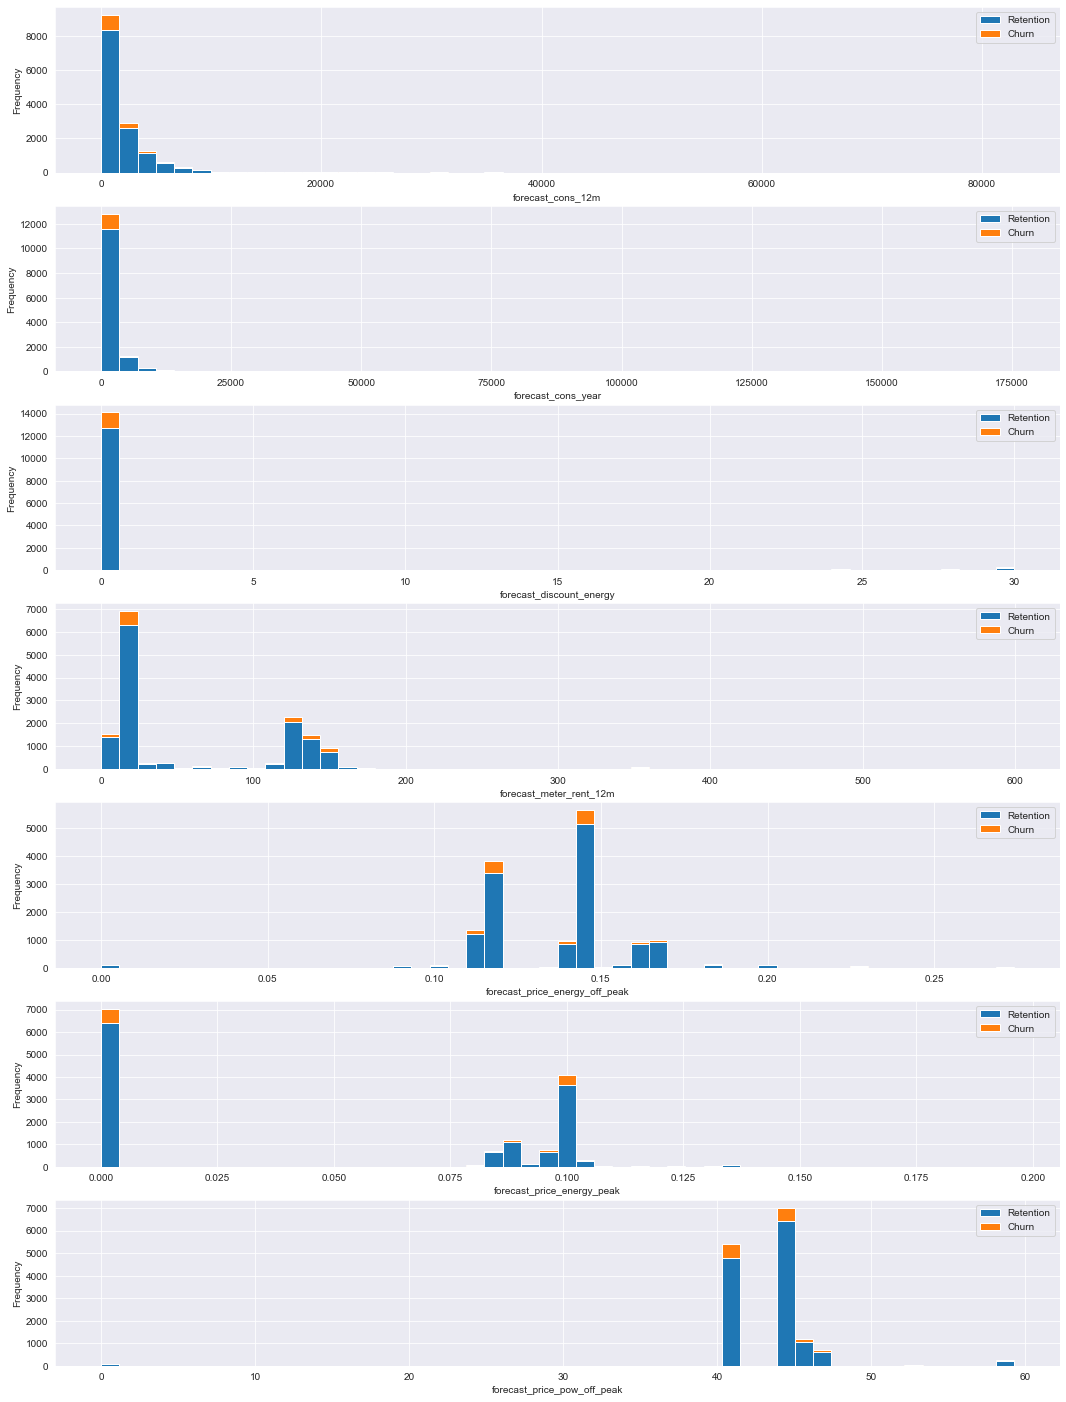

In [27]:
excluded_col=['id','churn']
fig,axs = plt.subplots(nrows=7,figsize=(18,25))
for i,col in enumerate(forecast.columns):
    if col not in excluded_col:
        i=i-1
        plot_distribution(forecast,col,axs[i])
    

Similarly to the consumption plots, we can observe that a lot of the variables are highly positively skewed, creating a very long tail for the higher values. We will make some transformations during feature engineering to correct for this skewness.

#### Determining the skewess of a distribution

In [28]:
from scipy.stats import skew

# Calculate skewness
skewness = skew(df['forecast_cons_12m'])

# Print the skewness value
print("Skewness:", skewness)
#If the skewness is close to 0, the distribution is approximately symmetric.
#If the skewness is positive, the distribution is right-skewed (tail to the right).
#If the skewness is negative, the distribution is left-skewed (tail to the left).


Skewness: 7.15511770632194


### Margins

In [29]:
margin = df[['id', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'net_margin','churn']]

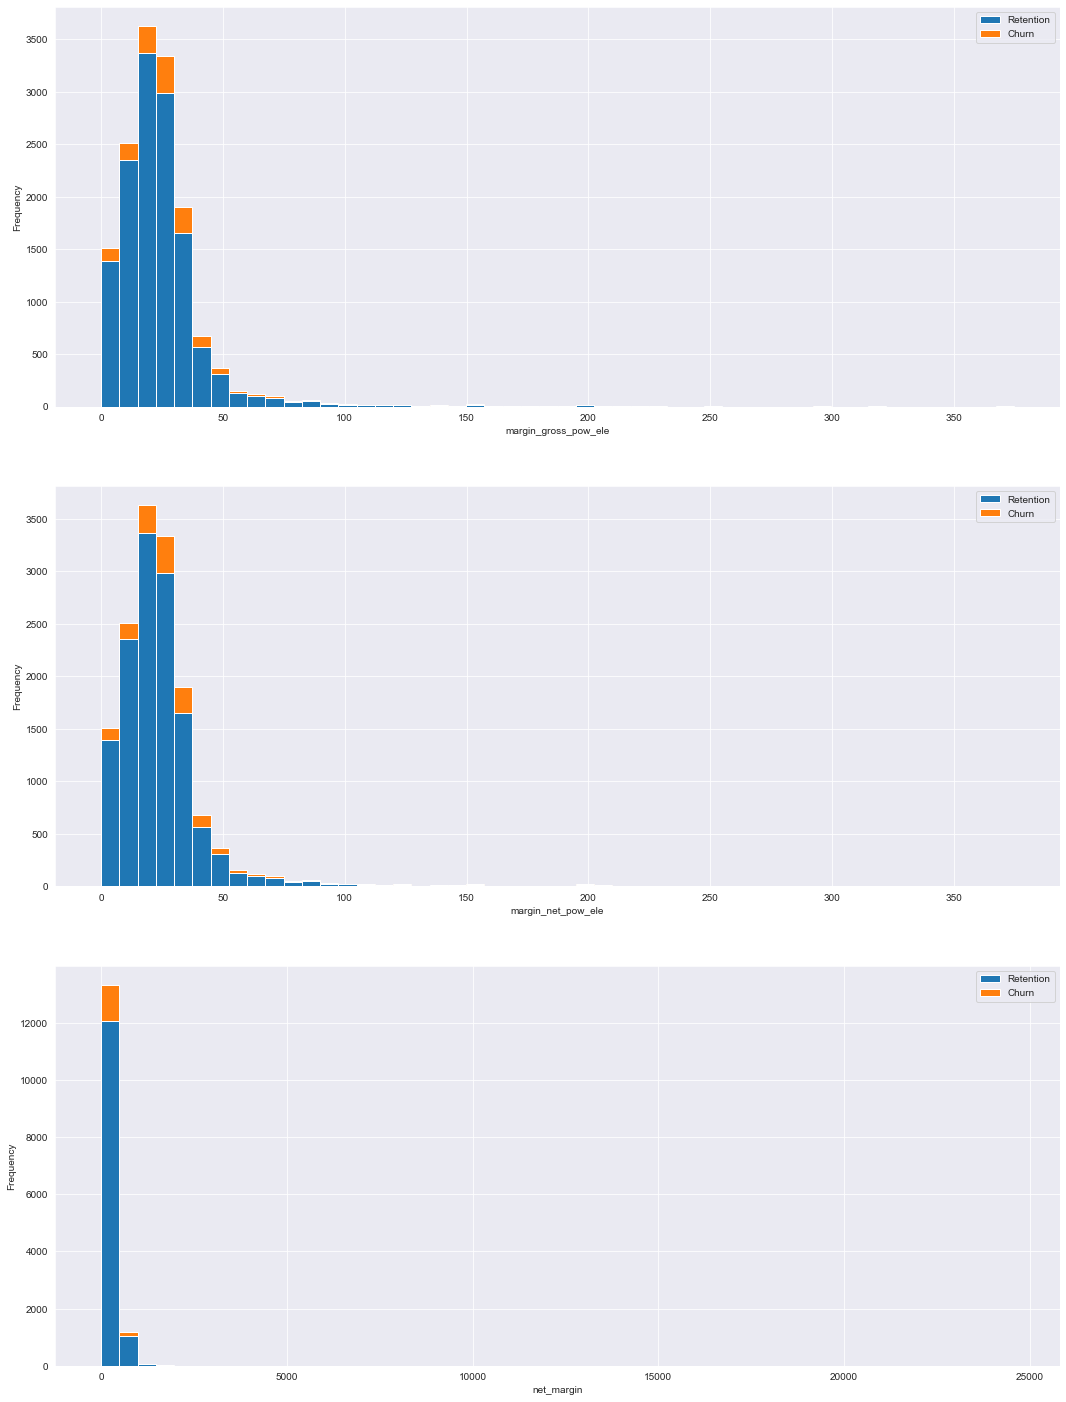

In [30]:
excluded_col=['id','churn']
fig,axs = plt.subplots(nrows=3,figsize=(18,25))
for i,col in enumerate(margin.columns):
    if col not in excluded_col:
        i=i-1
        plot_distribution(margin,col,axs[i])

C:\Users\Richard\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\Richard\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\Richard\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



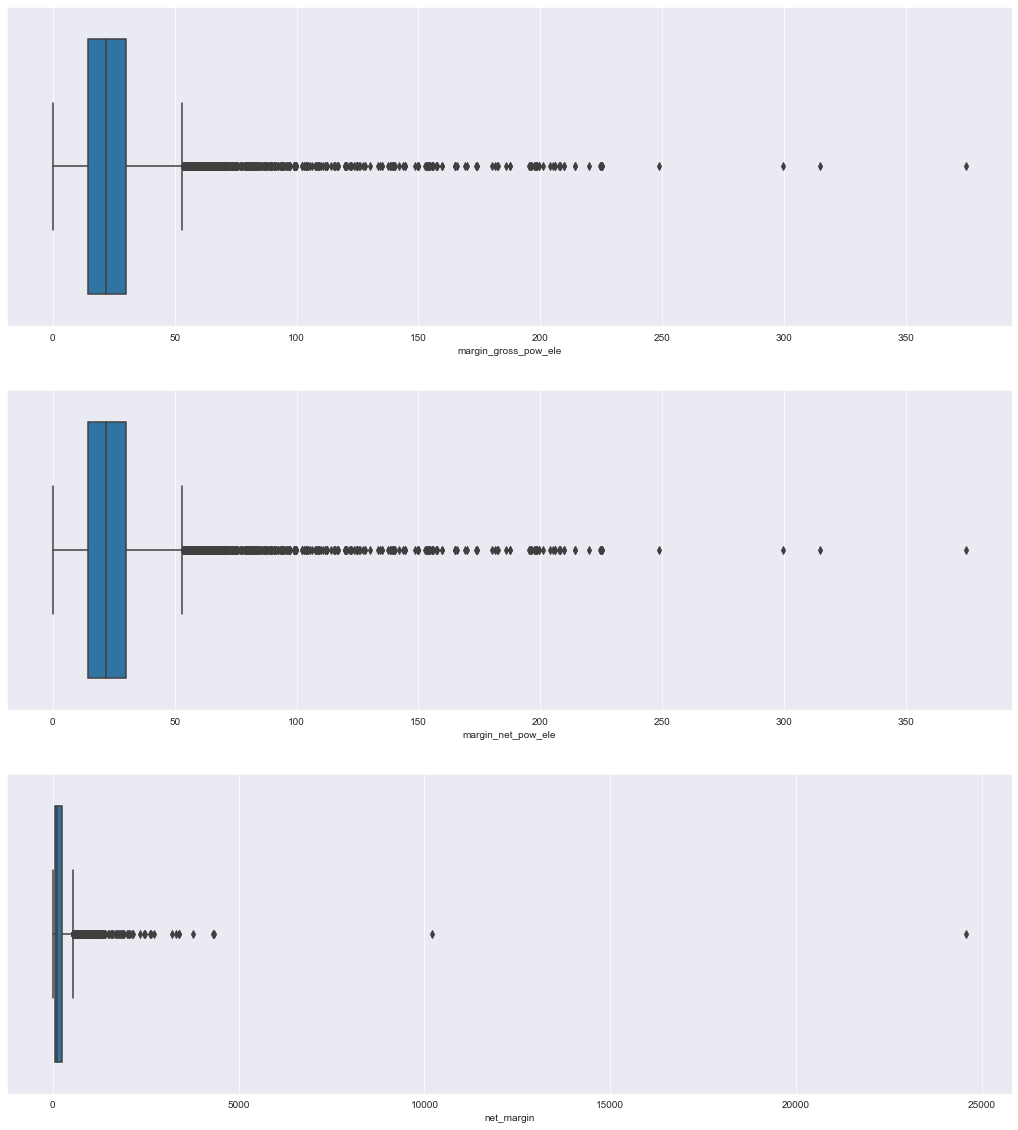

In [31]:
fig, axs = plt.subplots(nrows=3, figsize=(18,20))
# Plot histogram
sns.boxplot(margin["margin_gross_pow_ele"], ax=axs[0])
sns.boxplot(margin["margin_net_pow_ele"],ax=axs[1])
sns.boxplot(margin["net_margin"], ax=axs[2])
# Remove scientific notation
axs[0].ticklabel_format(style='plain', axis='x')
axs[1].ticklabel_format(style='plain', axis='x')
axs[2].ticklabel_format(style='plain', axis='x')
plt.show()

We can see some outliers here as well

### Subcribed Power

In [32]:
power = df[['id', 'pow_max', 'churn']]

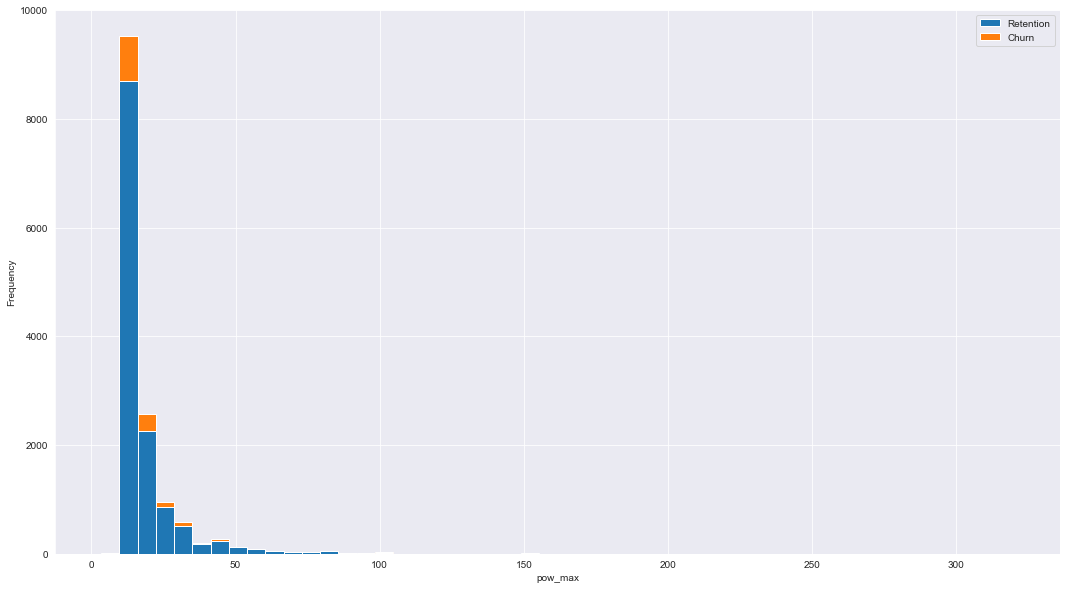

In [33]:
fig, axs = plt.subplots(nrows=1, figsize=(18, 10))
plot_distribution(power, 'pow_max', axs)

### Other Colunms

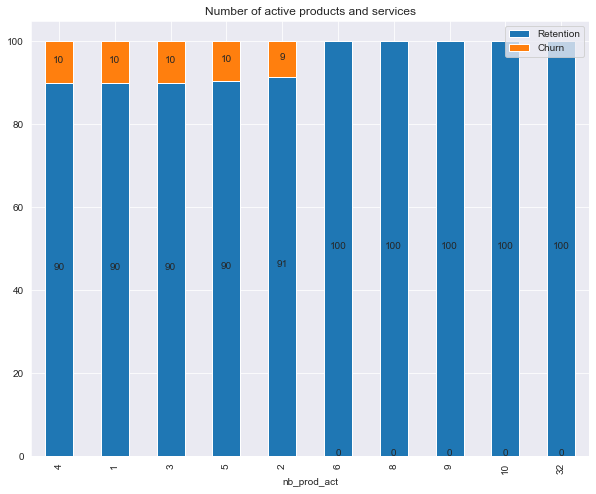

In [34]:
others = df[['id', 'nb_prod_act', 'num_years_antig', 'origin_up', 'churn']]
products = others.groupby("nb_prod_act")["churn"].value_counts().unstack(fill_value=0)
products_percentage = (products.div(products.sum(axis=1), axis=0)*100).sort_values(by=[1], ascending=False)
stacked_bar(products_percentage,'Number of active products and services',(10,8))

This stacked bar chars hows the distribution of churns based on the numbers of active products and services they have.
<br>
This charts depict clients fewer that 5 active products and services are more likely to have churners

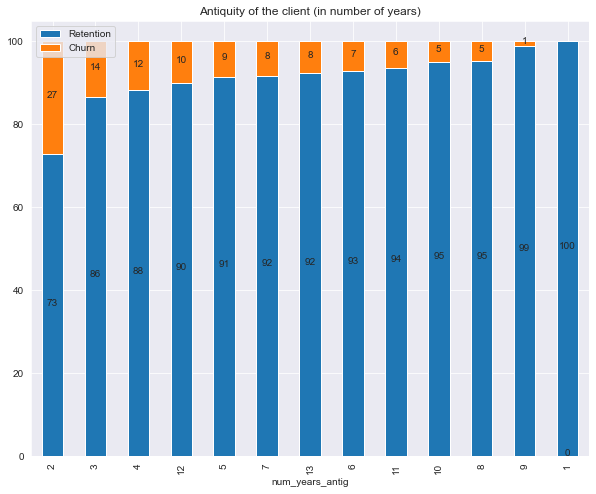

In [35]:
years_antig = others.groupby('num_years_antig')["churn"].value_counts().unstack(fill_value=0)
years_antig_percentage = (years_antig .div(years_antig .sum(axis=1), axis=0)*100).sort_values(by=[1], ascending=False)
stacked_bar(years_antig_percentage,'Antiquity of the client (in number of years)',(10,8))

27% of clients with 2 years of Antiquity churned which is the most based on the years of Antiquity per client

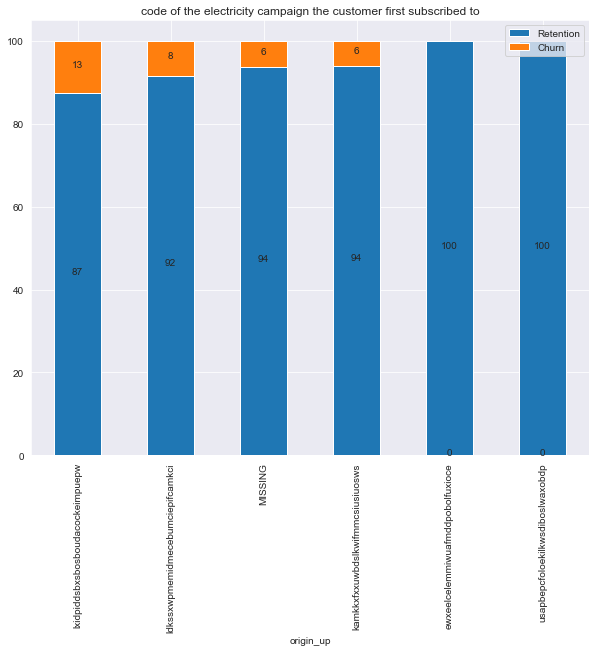

In [36]:
others = df[['id', 'nb_prod_act', 'num_years_antig', 'origin_up', 'churn']]
origin_up = others.groupby("origin_up")["churn"].value_counts().unstack(fill_value=0)
origin_up_percentage = (origin_up.div(origin_up.sum(axis=1), axis=0)*100).sort_values(by=[1], ascending=False)
stacked_bar(origin_up_percentage,'code of the electricity campaign the customer first subscribed to',(10,8))

This stacked bar shows the percentage(%) of churners based on the code of the electricity campaign the customer first subscribed to

### Prices
Now lets take a look at the Price dataset for PowerCo

#### Lets take a look at the distribution of energy prices during different periods of the day (i.e, Off_peak, Mid_peak and Peak period)

#### Energy

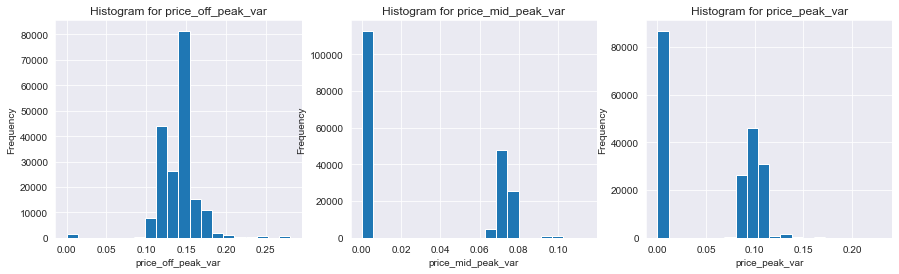

In [37]:
#creating a list of price
energy_prices = ['price_off_peak_var','price_mid_peak_var','price_peak_var']

#creating my figure with subplots
fig,axs= plt.subplots(1, len(energy_prices), figsize=(15,4))

for i,value in enumerate(energy_prices):
    axs[i].hist(df1[value], bins=20)
    axs[i].set_xlabel(value)
    axs[i].set_ylabel('Frequency')
    axs[i].set_title(f'Histogram for {value}')
plt.show()


The average price of energy(0.15/watt) during the off_peak periods tends to be higher than the Mid_peak and Peak .
<br>
Also client tend to purchase engery more during the off_peak period when the demand for energy is low. Thats is why there is so many zero(0) values during the mid and peak periods

#### Power

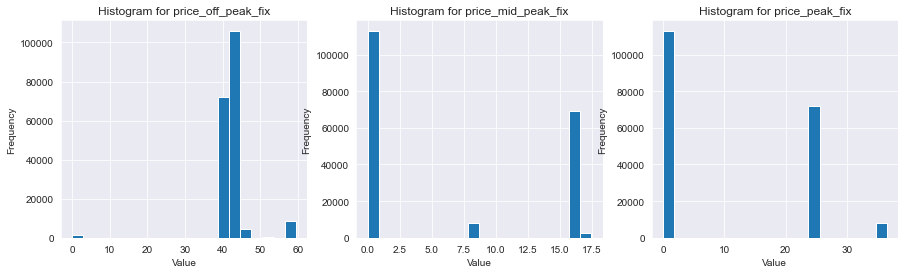

In [38]:
#creating a list of price
power_prices = ['price_off_peak_fix','price_mid_peak_fix','price_peak_fix']

#creating my figure with subplots
fig,axs= plt.subplots(1, len(power_prices), figsize=(15,4))

for i,value in enumerate(power_prices):
    axs[i].hist(df1[value], bins=20)
    axs[i].set_xlabel('Value')
    axs[i].set_ylabel('Frequency')
    axs[i].set_title(f'Histogram for {value}')
plt.show()

The price of power during the off_peak period is higher than the other period due to higer demand. while customers rarely purchase power the mid and peak period

Since the distribution looks fairly normal lets find th average price of energy per day

### Hypothesis Testing 1

#### Lets explore our data to verify the hypothesis that price sensitivity is related to churn 

What is Price Sensitivity? Price Sensitivity can be defined as the difference between the average price of churned customers and non_chunred customers
<br>
Price Sensitivity = Avg_price(churned) > Avg_price(non-churned), there is a price sensitivity


In [39]:
df1.head()

id  price_date  price_off_peak_var  \
0  038af19179925da21a25619c5a24b745  2015-01-01            0.151367   
1  038af19179925da21a25619c5a24b745  2015-02-01            0.151367   
2  038af19179925da21a25619c5a24b745  2015-03-01            0.151367   
3  038af19179925da21a25619c5a24b745  2015-04-01            0.149626   
4  038af19179925da21a25619c5a24b745  2015-05-01            0.149626   

   price_peak_var  price_mid_peak_var  price_off_peak_fix  price_peak_fix  \
0             0.0                 0.0           44.266931             0.0   
1             0.0                 0.0           44.266931             0.0   
2             0.0                 0.0           44.266931             0.0   
3             0.0                 0.0           44.266931             0.0   
4             0.0                 0.0           44.266931             0.0   

   price_mid_peak_fix  
0                 0.0  
1                 0.0  
2                 0.0  
3                 0.0  
4                 0.0

In [40]:
#lets fing the average each customers pay on energy and join the data to our client dataframe
df1 = df1.groupby('id').mean()
df1.head()

price_off_peak_var  price_peak_var  \
id                                                                     
0002203ffbb812588b632b9e628cc38d            0.124338        0.103794   
0004351ebdd665e6ee664792efc4fd13            0.146426        0.000000   
0010bcc39e42b3c2131ed2ce55246e3c            0.181558        0.000000   
0010ee3855fdea87602a5b7aba8e42de            0.118757        0.098292   
00114d74e963e47177db89bc70108537            0.147926        0.000000   

                                  price_mid_peak_var  price_off_peak_fix  \
id                                                                         
0002203ffbb812588b632b9e628cc38d            0.073160           40.701732   
0004351ebdd665e6ee664792efc4fd13            0.000000           44.385450   
0010bcc39e42b3c2131ed2ce55246e3c            0.000000           45.319710   
0010ee3855fdea87602a5b7aba8e42de            0.069032           40.647427   
00114d74e963e47177db89bc70108537            0.000000           44.266930   

                                  price_peak_fix  price_mid_peak_fix  
id                                                                    
0002203ffbb812588b632b9e628cc38d       24.421038           16.280694  
0004351ebdd665e6ee664792efc4fd13        0.000000            0.000000  
0010bcc39e42b3c2131ed2ce55246e3c        0.000000            0.000000  
0010ee3855fdea87602a5b7aba8e42de       24.388455           16.258971  
00114d74e963e47177db89bc70108537        0.000000            0.000000

In [41]:
#Merging the two DataFrame on the 'id' column
merged_df = df.merge(df1,on='id',how='inner')
merged_df.head()

id                     channel_sales  \
0  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
1  d29c2c54acc38ff3c0614d0a653813dd                           MISSING   
2  764c75f661154dac3a6c254cd082ea7d  foosdfpfkusacimwkcsosbicdxkicaua   
3  bba03439a292a1e166f80264c16191cb  lmkebamcaaclubfxadlmueccxoimlema   
4  149d57cf92fc41cf94415803a877cb4b                           MISSING   

   cons_12m  cons_gas_12m  cons_last_month date_activ   date_end  \
0         0         54946                0 2013-06-15 2016-06-15   
1      4660             0                0 2009-08-21 2016-08-30   
2       544             0                0 2010-04-16 2016-04-16   
3      1584             0                0 2010-03-30 2016-03-30   
4      4425             0              526 2010-01-13 2016-03-07   

  date_modif_prod date_renewal  forecast_cons_12m  ...  pow_max  churn  \
0      2015-11-01   2015-06-23               0.00  ...   43.648      1   
1      2009-08-21   2015-08-31             189.95  ...   13.800      0   
2      2010-04-16   2015-04-17              47.96  ...   13.856      0   
3      2010-03-30   2015-03-31             240.04  ...   13.200      0   
4      2010-01-13   2015-03-09             445.75  ...   19.800      0   

   contract_yrs    churn_1  price_off_peak_var  price_peak_var  \
0           3.0      Churn            0.124787        0.100749   
1           7.0  Retention            0.149609        0.007124   
2           6.0  Retention            0.170512        0.088421   
3           6.0  Retention            0.151210        0.000000   
4           6.0  Retention            0.124174        0.103638   

  price_mid_peak_var  price_off_peak_fix  price_peak_fix  price_mid_peak_fix  
0           0.066530           40.942265       22.352010           14.901340  
1           0.000000           44.311375        0.000000            0.000000  
2           0.000000           44.385450        0.000000            0.000000  
3           0.000000           44.400265        0.000000            0.000000  
4           0.072865           40.688156       24.412893           16.275263  

[5 rows x 34 columns]

In [42]:
#converting all the date column to datetime data type
for column in merged_df.columns:
    if 'date' in column.lower():   #check if the lowercase version of the column name contains the word "date." 
        merged_df[column] = pd.to_datetime(merged_df[column])

In [43]:
merged_df = merged_df.loc[:,['id', 'forecast_price_energy_off_peak', 'forecast_price_energy_peak',
                      'forecast_price_pow_off_peak', 'price_off_peak_var', 'price_mid_peak_var', 
                       'price_peak_var', 'price_off_peak_fix', 'price_mid_peak_fix', 
                       'price_peak_fix', 'churn' ]]

In [44]:
#The average energy price per year
merged_df['avg_price_energy'] = (merged_df['price_off_peak_var'] + merged_df['price_mid_peak_var'] + merged_df['price_peak_var'])

In [45]:
#The average power price per year
merged_df['avg_price_power'] = (merged_df['price_off_peak_fix'] + merged_df['price_mid_peak_fix'] + merged_df['price_peak_fix'])

In [46]:
#The average forecasted energy
merged_df['forecast_avg_energy'] = (merged_df['forecast_price_energy_off_peak'] + merged_df['forecast_price_energy_peak'])

In [47]:
#The forecasted power
merged_df['forecast_power'] = merged_df['forecast_price_pow_off_peak']

In [48]:
#Aveage price
merged_df['avg_price'] = merged_df['avg_price_power'] + merged_df['avg_price_energy']
merged_df['avg_forecast_price'] = merged_df['forecast_avg_energy'] + merged_df['forecast_power']

In [49]:
merged_df.head()

id  forecast_price_energy_off_peak  \
0  24011ae4ebbe3035111d65fa7c15bc57                        0.114481   
1  d29c2c54acc38ff3c0614d0a653813dd                        0.145711   
2  764c75f661154dac3a6c254cd082ea7d                        0.165794   
3  bba03439a292a1e166f80264c16191cb                        0.146694   
4  149d57cf92fc41cf94415803a877cb4b                        0.116900   

   forecast_price_energy_peak  forecast_price_pow_off_peak  \
0                    0.098142                    40.606701   
1                    0.000000                    44.311378   
2                    0.087899                    44.311378   
3                    0.000000                    44.311378   
4                    0.100015                    40.606701   

   price_off_peak_var  price_mid_peak_var  price_peak_var  price_off_peak_fix  \
0            0.124787            0.066530        0.100749           40.942265   
1            0.149609            0.000000        0.007124           44.311375   
2            0.170512            0.000000        0.088421           44.385450   
3            0.151210            0.000000        0.000000           44.400265   
4            0.124174            0.072865        0.103638           40.688156   

   price_mid_peak_fix  price_peak_fix  churn  avg_price_energy  \
0           14.901340       22.352010      1          0.292067   
1            0.000000        0.000000      0          0.156732   
2            0.000000        0.000000      0          0.258933   
3            0.000000        0.000000      0          0.151210   
4           16.275263       24.412893      0          0.300678   

   avg_price_power  forecast_avg_energy  forecast_power  avg_price  \
0        78.195616             0.212623       40.606701  78.487683   
1        44.311375             0.145711       44.311378  44.468108   
2        44.385450             0.253693       44.311378  44.644383   
3        44.400265             0.146694       44.311378  44.551475   
4        81.376312             0.216915       40.606701  81.676990   

   avg_forecast_price  
0           40.819324  
1           44.457089  
2           44.565071  
3           44.458072  
4           40.823616

In [50]:
corr = merged_df.corr()
corr

forecast_price_energy_off_peak  \
forecast_price_energy_off_peak                        1.000000   
forecast_price_energy_peak                           -0.330138   
forecast_price_pow_off_peak                           0.630377   
price_off_peak_var                                    0.951222   
price_mid_peak_var                                   -0.643987   
price_peak_var                                       -0.355831   
price_off_peak_fix                                    0.575805   
price_mid_peak_fix                                   -0.645149   
price_peak_fix                                       -0.665798   
churn                                                -0.010837   
avg_price_energy                                     -0.261027   
avg_price_power                                      -0.548889   
forecast_avg_energy                                   0.179260   
forecast_power                                        0.630377   
avg_price                                            -0.548083   
avg_forecast_price                                    0.631708   

                                forecast_price_energy_peak  \
forecast_price_energy_off_peak                   -0.330138   
forecast_price_energy_peak                        1.000000   
forecast_price_pow_off_peak                      -0.242017   
price_off_peak_var                               -0.299122   
price_mid_peak_var                                0.803913   
price_peak_var                                    0.994046   
price_off_peak_fix                               -0.207921   
price_mid_peak_fix                                0.796767   
price_peak_fix                                    0.791487   
churn                                             0.029315   
avg_price_energy                                  0.964267   
avg_price_power                                   0.778985   
forecast_avg_energy                               0.869462   
forecast_power                                   -0.242017   
avg_price                                         0.780157   
avg_forecast_price                               -0.232696   

                                forecast_price_pow_off_peak  \
forecast_price_energy_off_peak                     0.630377   
forecast_price_energy_peak                        -0.242017   
forecast_price_pow_off_peak                        1.000000   
price_off_peak_var                                 0.636799   
price_mid_peak_var                                -0.325664   
price_peak_var                                    -0.249559   
price_off_peak_fix                                 0.934633   
price_mid_peak_fix                                -0.371031   
price_peak_fix                                    -0.265509   
churn                                              0.014778   
avg_price_energy                                  -0.131540   
avg_price_power                                   -0.096427   
forecast_avg_energy                                0.077663   
forecast_power                                     1.000000   
avg_price                                         -0.096620   
avg_forecast_price                                 0.999945   

                                price_off_peak_var  price_mid_peak_var  \
forecast_price_energy_off_peak            0.951222           -0.643987   
forecast_price_energy_peak               -0.299122            0.803913   
forecast_price_pow_off_peak               0.636799           -0.325664   
price_off_peak_var                        1.000000           -0.609086   
price_mid_peak_var                       -0.609086            1.000000   
price_peak_var                           -0.317882            0.822436   
price_off_peak_fix                        0.662064           -0.288083   
price_mid_peak_fix                       -0.609196            0.991544   
price_peak_fix                           -0.631643            0.987691   
churn                                    -

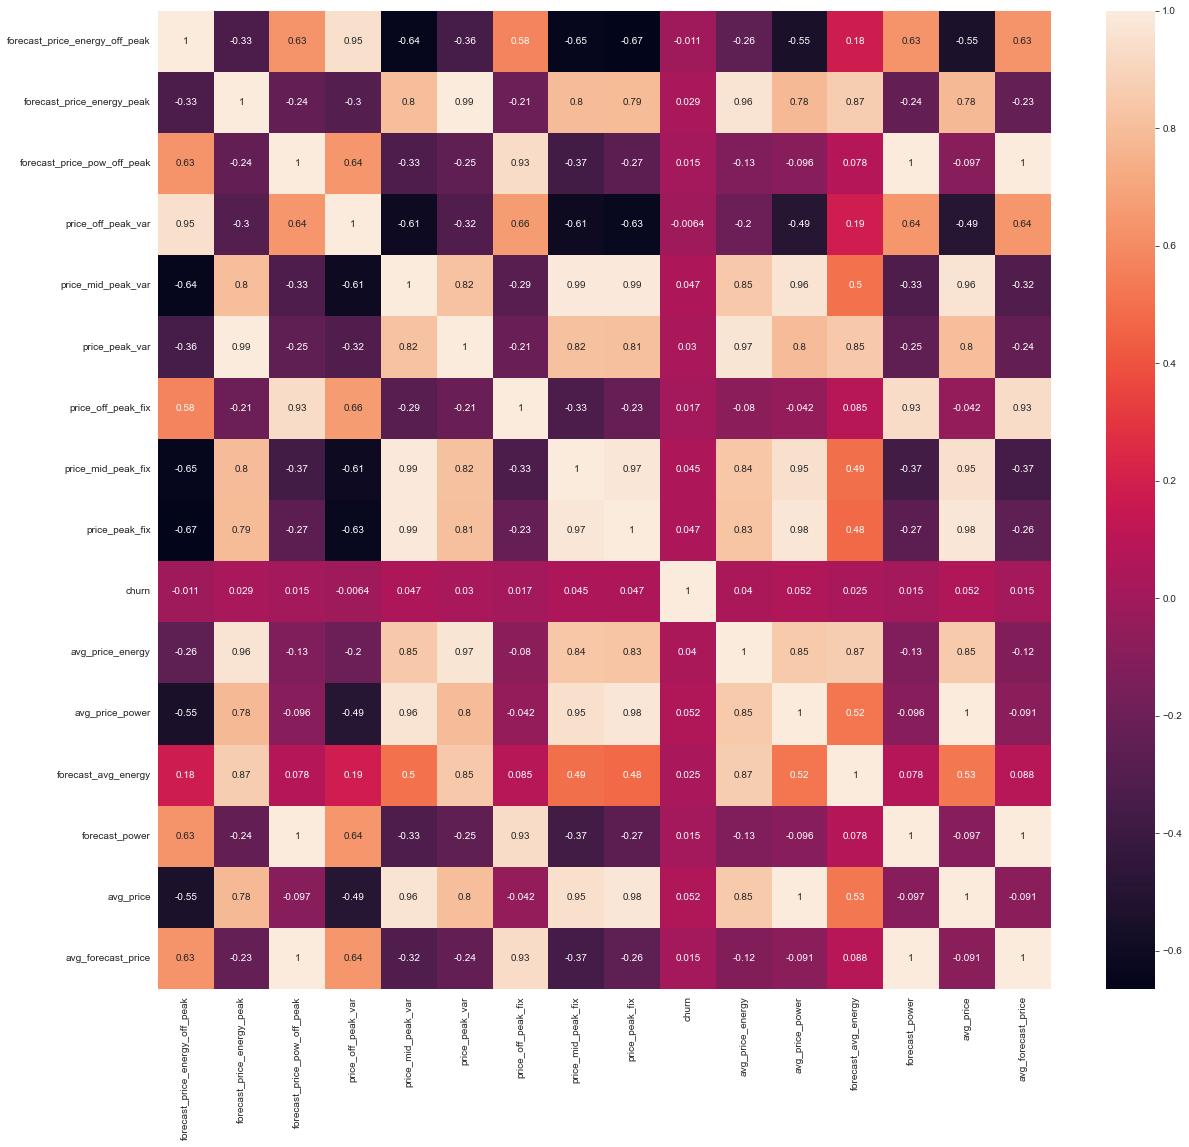

In [51]:
# Plot correlation
plt.figure(figsize=(20,18))
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot = True, annot_kws={'size':10})
# Axis ticks size
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

From the correlation plot, it shows a higher magnitude of correlation between other price sensitivity variables, however overall the correlation with churn is very low. This indicates that there is a weak linear relationship between price sensitity and churn. This suggests that for price sensivity to be a major driver for predicting churn, we may need to engineer the feature differently.

#### Price Sensitivity for Energy

In [52]:
#Calculating price sensitivity for churned and non-chunrned customers
churned_customers =  merged_df[merged_df['churn'] == 1]
non_churned_customers =  merged_df[merged_df['churn'] == 0]


#Calculating the average for those that churned and those that didnt churned
avg_churned_price_var = churned_customers['avg_price_energy'].mean()
avg_non_churned_price_var = non_churned_customers['avg_price_energy'].mean()

# Calculate price sensitivity as the difference in average prices
price_sensitivity = avg_churned_price_var - avg_non_churned_price_var

print("Price Sensitivity:", price_sensitivity)

if price_sensitivity > 0:
    print('On average, Churned Customers pay more, indicating a potential price sensitivity. Hence a relationship between Energy Price and Churned customers')
else:
    print('No Relationship between Energy price and Churned Customers')

Price Sensitivity: 0.01012113724627639
On average, Churned Customers pay more, indicating a potential price sensitivity. Hence a relationship between Energy Price and Churned customers


But the Price Sensitivity between churned and non-churned customers who purchase Energy is very low

#### Price Sensitivity for Power

In [53]:
#Calculating price sensitivity for churned and non-chunrned customers
churned_customers =  merged_df[merged_df['churn'] == 1]
non_churned_customers =  merged_df[merged_df['churn'] == 0]


#Calculating the average for those that churned and those that didnt churned
avg_churned_price_fix = churned_customers['avg_price_power'].mean()
avg_non_churned_price_fix = non_churned_customers['avg_price_power'].mean()

# Calculate price sensitivity as the difference in average prices
price_sensitivity = avg_churned_price_fix - avg_non_churned_price_fix

print("Price Sensitivity:", price_sensitivity)

if price_sensitivity > 0:
    print('On average, Churned Customers pay more, indicating a potential price sensitivity. Hence a relationship between Energy Price and Churned customers')
else:
    print('No Relationship between Energy price and Churned Customers')

Price Sensitivity: 3.3572163911368094
On average, Churned Customers pay more, indicating a potential price sensitivity. Hence a relationship between Energy Price and Churned customers


In [54]:
#Calculating price sensitivity for churned and non-chunrned customers
churned_customers =  merged_df[merged_df['churn'] == 1]
non_churned_customers =  merged_df[merged_df['churn'] == 0]


#Calculating the average for those that churned and those that didnt churned
avg_churned_price = churned_customers['avg_price'].mean()
avg_non_churned_price = non_churned_customers['avg_price'].mean()

# Calculate price sensitivity as the difference in average prices
price_sensitivity = avg_churned_price - avg_non_churned_price

print("Price Sensitivity:", price_sensitivity)

if price_sensitivity > 0:
    print('On average, Churned Customers pay more, indicating a potential price sensitivity. Hence a relationship between  Price and Churned customers')
else:
    print('No Relationship between price and Churned Customers')

Price Sensitivity: 3.3673375283824853
On average, Churned Customers pay more, indicating a potential price sensitivity. Hence a relationship between  Price and Churned customers


### Hypothesis 2

Instead of calculating the total average price. we break it down into total average price each client spent in a year and per month

In [55]:
#reading our data
client=pd.read_csv('client_data.csv')
price=pd.read_csv('price_data.csv')

In [56]:
client_df =  client.copy()
price_df = price.copy()

In [57]:
price_df.head()

id  price_date  price_off_peak_var  \
0  038af19179925da21a25619c5a24b745  2015-01-01            0.151367   
1  038af19179925da21a25619c5a24b745  2015-02-01            0.151367   
2  038af19179925da21a25619c5a24b745  2015-03-01            0.151367   
3  038af19179925da21a25619c5a24b745  2015-04-01            0.149626   
4  038af19179925da21a25619c5a24b745  2015-05-01            0.149626   

   price_peak_var  price_mid_peak_var  price_off_peak_fix  price_peak_fix  \
0             0.0                 0.0           44.266931             0.0   
1             0.0                 0.0           44.266931             0.0   
2             0.0                 0.0           44.266931             0.0   
3             0.0                 0.0           44.266931             0.0   
4             0.0                 0.0           44.266931             0.0   

   price_mid_peak_fix  
0                 0.0  
1                 0.0  
2                 0.0  
3                 0.0  
4                 0.0

In [58]:
price_df.groupby('id').mean()

price_off_peak_var  price_peak_var  \
id                                                                     
0002203ffbb812588b632b9e628cc38d            0.124338        0.103794   
0004351ebdd665e6ee664792efc4fd13            0.146426        0.000000   
0010bcc39e42b3c2131ed2ce55246e3c            0.181558        0.000000   
0010ee3855fdea87602a5b7aba8e42de            0.118757        0.098292   
00114d74e963e47177db89bc70108537            0.147926        0.000000   
...                                              ...             ...   
ffef185810e44254c3a4c6395e6b4d8a            0.138863        0.115125   
fffac626da707b1b5ab11e8431a4d0a2            0.147137        0.000000   
fffc0cacd305dd51f316424bbb08d1bd            0.153879        0.129497   
fffe4f5646aa39c7f97f95ae2679ce64            0.123858        0.103499   
ffff7fa066f1fb305ae285bb03bf325a            0.125360        0.104895   

                                  price_mid_peak_var  price_off_peak_fix  \
id                                                                         
0002203ffbb812588b632b9e628cc38d            0.073160           40.701732   
0004351ebdd665e6ee664792efc4fd13            0.000000           44.385450   
0010bcc39e42b3c2131ed2ce55246e3c            0.000000           45.319710   
0010ee3855fdea87602a5b7aba8e42de            0.069032           40.647427   
00114d74e963e47177db89bc70108537            0.000000           44.266930   
...                                              ...                 ...   
ffef185810e44254c3a4c6395e6b4d8a            0.080780           40.896427   
fffac626da707b1b5ab11e8431a4d0a2            0.000000           44.311375   
fffc0cacd305dd51f316424bbb08d1bd            0.094842           41.160171   
fffe4f5646aa39c7f97f95ae2679ce64            0.073735           40.606699   
ffff7fa066f1fb305ae285bb03bf325a            0.075635           40.647427   

                                  price_peak_fix  price_mid_peak_fix  
id                                                                    
0002203ffbb812588b632b9e628cc38d       24.421038           16.280694  
0004351ebdd665e6ee664792efc4fd13        0.000000            0.000000  
0010bcc39e42b3c2131ed2ce55246e3c        0.000000            0.000000  
0010ee3855fdea87602a5b7aba8e42de       24.388455           16.258971  
00114d74e963e47177db89bc70108537        0.000000            0.000000  
...                                          ...                 ...  
ffef185810e44254c3a4c6395e6b4d8a       24.637456           16.507972  
fffac626da707b1b5ab11e8431a4d0a2        0.000000            0.000000  
fffc0cacd305dd51f316424bbb08d1bd       24.895768           16.763569  
fffe4f5646aa39c7f97f95ae2679ce64       24.364017           16.242678  
ffff7fa066f1fb305ae285bb03bf325a       24.388455           16.258971  

[16096 rows x 6 columns]

In [59]:
#converting all the date column to datetime data type
for column in df1.columns:
    if 'date' in column.lower():   #check if the lowercase version of the column name contains the word "date." 
        df1[column] = pd.to_datetime(df1[column])

In [60]:
# Transform date columns to datetime type
client_df["date_activ"] = pd.to_datetime(client_df["date_activ"], format='%Y-%m-%d')
client_df["date_end"] = pd.to_datetime(client_df["date_end"], format='%Y-%m-%d')
client_df["date_modif_prod"] = pd.to_datetime(client_df["date_modif_prod"], format='%Y-%m-%d')
client_df["date_renewal"] = pd.to_datetime(client_df["date_renewal"], format='%Y-%m-%d')
price_df['price_date'] = pd.to_datetime(price_df['price_date'], format='%Y-%m-%d')

### feature engineering 

In [61]:
# Create mean average data of the years and each month
mean_year = price_df.groupby(['id']).mean().reset_index()
mean_m1 =  price_df[price_df['price_date'] == '2015-01-01' ].groupby('id').mean().reset_index()
mean_m2 =  price_df[price_df['price_date'] == '2015-02-01' ].groupby('id').mean().reset_index()
mean_m3 =  price_df[price_df['price_date'] == '2015-03-01' ].groupby('id').mean().reset_index()
mean_m4 =  price_df[price_df['price_date'] == '2015-04-01' ].groupby('id').mean().reset_index()
mean_m5 =  price_df[price_df['price_date'] == '2015-05-01' ].groupby('id').mean().reset_index()
mean_m6 =  price_df[price_df['price_date'] == '2015-06-01' ].groupby('id').mean().reset_index()
mean_m7 =  price_df[price_df['price_date'] == '2015-07-01' ].groupby('id').mean().reset_index()
mean_m8 =  price_df[price_df['price_date'] == '2015-08-01' ].groupby('id').mean().reset_index()
mean_m9 =  price_df[price_df['price_date'] == '2015-09-01' ].groupby('id').mean().reset_index()
mean_m10 = price_df[price_df['price_date'] == '2015-10-01' ].groupby('id').mean().reset_index()
mean_m11 = price_df[price_df['price_date'] == '2015-11-01' ].groupby('id').mean().reset_index()
mean_m12 = price_df[price_df['price_date'] == '2015-12-01' ].groupby('id').mean().reset_index()

In [62]:
#Adding the mean price for energy and power for the year and each months during the off_peak,mid_peak and peak season
mean_year["mean_year_price_off_peak"] = mean_year['price_off_peak_var'] + mean_year['price_off_peak_fix']
mean_year["mean_year_price_mid_peak"] = mean_year['price_mid_peak_var'] + mean_year['price_mid_peak_fix']
mean_year["mean_year_price_peak"]     = mean_year['price_peak_var'] + mean_year['price_peak_fix']

mean_m1['mean_m1_price_off_peak'] = mean_m1['price_off_peak_var'] + mean_m1['price_off_peak_fix'] 
mean_m1['mean_m1_price_mid_peak'] = mean_m1['price_mid_peak_var'] + mean_m1['price_mid_peak_fix'] 
mean_m1['mean_m1_price_peak'] = mean_m1['price_peak_var'] + mean_m1['price_peak_fix'] 


mean_m2['mean_m2_price_off_peak'] = mean_m2['price_off_peak_var'] + mean_m2['price_off_peak_fix'] 
mean_m2['mean_m2_price_mid_peak'] = mean_m2['price_mid_peak_var'] + mean_m2['price_mid_peak_fix'] 
mean_m2['mean_m2_price_peak'] = mean_m2['price_peak_var'] + mean_m2['price_peak_fix']


mean_m3['mean_m3_price_off_peak'] = mean_m3['price_off_peak_var'] + mean_m3['price_off_peak_fix'] 
mean_m3['mean_m3_price_mid_peak'] = mean_m3['price_mid_peak_var'] + mean_m3['price_mid_peak_fix'] 
mean_m3['mean_m3_price_peak'] = mean_m3['price_peak_var'] + mean_m3['price_peak_fix'] 


mean_m4['mean_m4_price_off_peak'] = mean_m4['price_off_peak_var'] + mean_m4['price_off_peak_fix'] 
mean_m4['mean_m4_price_mid_peak'] = mean_m4['price_mid_peak_var'] + mean_m4['price_mid_peak_fix'] 
mean_m4['mean_m4_price_peak'] = mean_m4['price_peak_var'] + mean_m4['price_peak_fix'] 


mean_m5['mean_m5_price_off_peak'] = mean_m5['price_off_peak_var'] + mean_m5['price_off_peak_fix'] 
mean_m5['mean_m5_price_mid_peak'] = mean_m5['price_mid_peak_var'] + mean_m5['price_mid_peak_fix'] 
mean_m5['mean_m5_price_peak'] = mean_m5['price_peak_var'] + mean_m5['price_peak_fix'] 


mean_m6['mean_m6_price_off_peak'] = mean_m6['price_off_peak_var'] + mean_m6['price_off_peak_fix'] 
mean_m6['mean_m6_price_mid_peak'] = mean_m6['price_mid_peak_var'] + mean_m6['price_mid_peak_fix'] 
mean_m6['mean_m6_price_peak'] = mean_m6['price_peak_var'] + mean_m6['price_peak_fix'] 


mean_m7['mean_m7_price_off_peak'] = mean_m7['price_off_peak_var'] + mean_m7['price_off_peak_fix'] 
mean_m7['mean_m7_price_mid_peak'] = mean_m7['price_mid_peak_var'] + mean_m7['price_mid_peak_fix'] 
mean_m7['mean_m7_price_peak'] = mean_m7['price_peak_var'] + mean_m7['price_peak_fix'] 


mean_m8['mean_m8_price_off_peak'] = mean_m8['price_off_peak_var'] + mean_m8['price_off_peak_fix'] 
mean_m8['mean_m8_price_mid_peak'] = mean_m8['price_mid_peak_var'] + mean_m8['price_mid_peak_fix'] 
mean_m8['mean_m8_price_peak'] = mean_m8['price_peak_var'] + mean_m8['price_peak_fix'] 


mean_m9['mean_m9_price_off_peak'] = mean_m9['price_off_peak_var'] + mean_m9['price_off_peak_fix'] 
mean_m9['mean_m9_price_mid_peak'] = mean_m9['price_mid_peak_var'] + mean_m9['price_mid_peak_fix'] 
mean_m9['mean_m9_price_peak'] = mean_m9['price_peak_var'] + mean_m9['price_peak_fix'] 


mean_m10['mean_m10_price_off_peak'] = mean_m10['price_off_peak_var'] + mean_m10['price_off_peak_fix'] 
mean_m10['mean_m10_price_mid_peak'] = mean_m10['price_mid_peak_var'] + mean_m10['price_mid_peak_fix'] 
mean_m10['mean_m10_price_peak'] = mean_m10['price_peak_var'] + mean_m10['price_peak_fix'] 


mean_m11['mean_m11_price_off_peak'] = mean_m11['price_off_peak_var'] + mean_m11['price_off_peak_fix'] 
mean_m11['mean_m11_price_mid_peak'] = mean_m11['price_mid_peak_var'] + mean_m11['price_mid_peak_fix'] 
mean_m11['mean_m11_price_peak'] = mean_m11['price_peak_var'] + mean_m11['price_peak_fix'] 


mean_m12['mean_m12_price_off_peak'] = mean_m12['price_off_peak_var'] + mean_m12['price_off_peak_fix'] 
mean_m12['mean_m12_price_mid_peak'] = mean_m12['price_mid_peak_var'] + mean_m12['price_mid_peak_fix'] 
mean_m12['mean_m12_price_peak'] = mean_m12['price_peak_var'] + mean_m12['price_peak_fix'] 

In [63]:
#renaming the column names
mean_year = mean_year.rename(
    index=str, 
    columns={
        "price_off_peak_var": "mean_year_price_p1_var",
        "price_mid_peak_var": "mean_year_price_p2_var",
        "price_peak_var": "mean_year_price_p3_var",
        "price_off_peak_fix": "mean_year_price_p1_fix",
        "price_mid_peak_fix": "mean_year_price_p2_fix",
        "price_peak_fix": "mean_year_price_p3_fix"})


mean_m1 = mean_m1.rename(
    index=str, 
    columns={
        "price_off_peak_var": "mean_m1_price_p1_var",
        "price_mid_peak_var": "mean_m1_price_p2_var",
        "price_peak_var": "mean_m1_price_p3_var",
        "price_off_peak_fix": "mean_m1_price_p1_fix",
        "price_mid_peak_fix": "mean_m1_price_p2_fix",
        "price_peak_fix": "mean_m1_price_p3_fix"})

mean_m2 = mean_m2.rename(
    index=str, 
    columns={
        "price_off_peak_var": "mean_m2_price_p1_var",
        "price_mid_peak_var": "mean_m2_price_p2_var",
        "price_peak_var": "mean_m2_price_p3_var",
        "price_off_peak_fix": "mean_m2_price_p1_fix",
        "price_mid_peak_fix": "mean_m2_price_p2_fix",
        "price_peak_fix": "mean_m2_price_p3_fix"})

mean_m3 = mean_m3.rename(
    index=str, 
    columns={
        "price_off_peak_var": "mean_m3_price_p1_var",
        "price_mid_peak_var": "mean_m3_price_p2_var",
        "price_peak_var": "mean_m3_price_p3_var",
        "price_off_peak_fix": "mean_m3_price_p1_fix",
        "price_mid_peak_fix": "mean_m3_price_p2_fix",
        "price_peak_fix": "mean_m3_price_p3_fix"})

mean_m4 = mean_m4.rename(
    index=str, 
    columns={
        "price_off_peak_var": "mean_m4_price_p1_var",
        "price_mid_peak_var": "mean_m4_price_p2_var",
        "price_peak_var": "mean_m4_price_p3_var",
        "price_off_peak_fix": "mean_m4_price_p1_fix",
        "price_mid_peak_fix": "mean_m4_price_p2_fix",
        "price_peak_fix": "mean_m4_price_p3_fix"})

mean_m5 = mean_m5.rename(
    index=str, 
    columns={
        "price_off_peak_var": "mean_m5_price_p1_var",
        "price_mid_peak_var": "mean_m1_price_p2_var",
        "price_peak_var": "mean_m5_price_p3_var",
        "price_off_peak_fix": "mean_m5_price_p1_fix",
        "price_mid_peak_fix": "mean_m5_price_p2_fix",
        "price_peak_fix": "mean_m5_price_p3_fix"})

mean_m6 = mean_m6.rename(
    index=str, 
    columns={
        "price_off_peak_var": "mean_m6_price_p1_var",
        "price_mid_peak_var": "mean_m6_price_p2_var",
        "price_peak_var": "mean_m6_price_p3_var",
        "price_off_peak_fix": "mean_m6_price_p1_fix",
        "price_mid_peak_fix": "mean_m6_price_p2_fix",
        "price_peak_fix": "mean_m6_price_p3_fix"})

mean_m7 = mean_m7.rename(
    index=str, 
    columns={
        "price_off_peak_var": "mean_m7_price_p1_var",
        "price_mid_peak_var": "mean_m7_price_p2_var",
        "price_peak_var": "mean_m7_price_p3_var",
        "price_off_peak_fix": "mean_m7_price_p1_fix",
        "price_mid_peak_fix": "mean_m7_price_p2_fix",
        "price_peak_fix": "mean_m7_price_p3_fix"})

mean_m8 = mean_m8.rename(
    index=str, 
    columns={
        "price_off_peak_var": "mean_m8_price_p1_var",
        "price_mid_peak_var": "mean_m8_price_p2_var",
        "price_peak_var": "mean_m8_price_p3_var",
        "price_off_peak_fix": "mean_m8_price_p1_fix",
        "price_mid_peak_fix": "mean_m8_price_p2_fix",
        "price_peak_fix": "mean_m8_price_p3_fix"})

mean_m9 = mean_m9.rename(
    index=str, 
    columns={
        "price_off_peak_var": "mean_m9_price_p1_var",
        "price_mid_peak_var": "mean_m9_price_p2_var",
        "price_peak_var": "mean_m9_price_p3_var",
        "price_off_peak_fix": "mean_m9_price_p1_fix",
        "price_mid_peak_fix": "mean_m9_price_p2_fix",
        "price_peak_fix": "mean_m9_price_p3_fix"})

mean_m10 = mean_m10.rename(
    index=str, 
    columns={
        "price_off_peak_var": "mean_m10_price_p1_var",
        "price_mid_peak_var": "mean_m10_price_p2_var",
        "price_peak_var": "mean_m10_price_p3_var",
        "price_off_peak_fix": "mean_m10_price_p1_fix",
        "price_mid_peak_fix": "mean_m10_price_p2_fix",
        "price_peak_fix": "mean_m10_price_p3_fix"})

mean_m11 = mean_m11.rename(
    index=str, 
    columns={
        "price_off_peak_var": "mean_m11_price_p1_var",
        "price_mid_peak_var": "mean_m11_price_p2_var",
        "price_peak_var": "mean_m11_price_p3_var",
        "price_off_peak_fix": "mean_m11_price_p1_fix",
        "price_mid_peak_fix": "mean_m11_price_p2_fix",
        "price_peak_fix": "mean_m11_price_p3_fix"})

mean_m12 = mean_m12.rename(
    index=str, 
    columns={
        "price_off_peak_var": "mean_m12_price_p1_var",
        "price_mid_peak_var": "mean_m12_price_p2_var",
        "price_peak_var": "mean_m12_price_p3_var",
        "price_off_peak_fix": "mean_m12_price_p1_fix",
        "price_mid_peak_fix": "mean_m12_price_p2_fix",
        "price_peak_fix": "mean_m12_price_p3_fix"})

In [64]:
# Comnbine into single dataframe 
mean_months = [mean_year,mean_m1,mean_m2,mean_m3,mean_m4,mean_m5,mean_m6,mean_m7,mean_m8,mean_m9,
               mean_m10,mean_m11,mean_m12]

# Merge dataframes in the list on 'id'
price_features1 = reduce(lambda left, right: pd.merge(left, right, on='id', how='inner'), mean_months)
price_features1

id  mean_year_price_p1_var  \
0      0002203ffbb812588b632b9e628cc38d                0.124338   
1      0004351ebdd665e6ee664792efc4fd13                0.146426   
2      0010bcc39e42b3c2131ed2ce55246e3c                0.181558   
3      0010ee3855fdea87602a5b7aba8e42de                0.118757   
4      00114d74e963e47177db89bc70108537                0.147926   
...                                 ...                     ...   
15985  ffef185810e44254c3a4c6395e6b4d8a                0.138863   
15986  fffac626da707b1b5ab11e8431a4d0a2                0.147137   
15987  fffc0cacd305dd51f316424bbb08d1bd                0.153879   
15988  fffe4f5646aa39c7f97f95ae2679ce64                0.123858   
15989  ffff7fa066f1fb305ae285bb03bf325a                0.125360   

       mean_year_price_p3_var  mean_year_price_p2_var  mean_year_price_p1_fix  \
0                    0.103794                0.073160               40.701732   
1                    0.000000                0.000000               44.385450   
2                    0.000000                0.000000               45.319710   
3                    0.098292                0.069032               40.647427   
4                    0.000000                0.000000               44.266930   
...                       ...                     ...                     ...   
15985                0.115125                0.080780               40.896427   
15986                0.000000                0.000000               44.311375   
15987                0.129497                0.094842               41.160171   
15988                0.103499                0.073735               40.606699   
15989                0.104895                0.075635               40.647427   

       mean_year_price_p3_fix  mean_year_price_p2_fix  \
0                   24.421038               16.280694   
1                    0.000000                0.000000   
2                    0.000000                0.000000   
3                   24.388455               16.258971   
4                    0.000000                0.000000   
...                       ...                     ...   
15985               24.637456               16.507972   
15986                0.000000                0.000000   
15987               24.895768               16.763569   
15988               24.364017               16.242678   
15989               24.388455               16.258971   

       mean_year_price_off_peak  mean_year_price_mid_peak  \
0                     40.826071                 16.353854   
1                     44.531877                  0.000000   
2                     45.501268                  0.000000   
3                     40.766185                 16.328003   
4                     44.414856                  0.000000   
...                         ...                       ...   
15985                 41.035291                 16.588752   
15986                 44.458512                  0.000000   
15987                 41.314049                 16.858411   
15988                 40.730558                 16.316414   
15989                 40.772788                 16.334606   

       mean_year_price_peak  ...  mean_m11_price_peak  mean_m12_price_p1_var  \
0                 24.524832  ...            24.539003               0.119906   
1                  0.000000  ...             0.000000               0.143943   
2                  0.000000  ...             0.000000               0.201280   
3                 24.486748  ...            24.532715               0.113068   
4                  0.000000  ...             0.000000               0.145440   
...                     ...  ...                  ...                    ...   
15985             24.752581  ...            24.532134               0.112488   
15986              0.000000  ...             0.000000               0.145047   
15987             25.025265  ...            25.064201               0.151399   
15988             24.467516  ...         

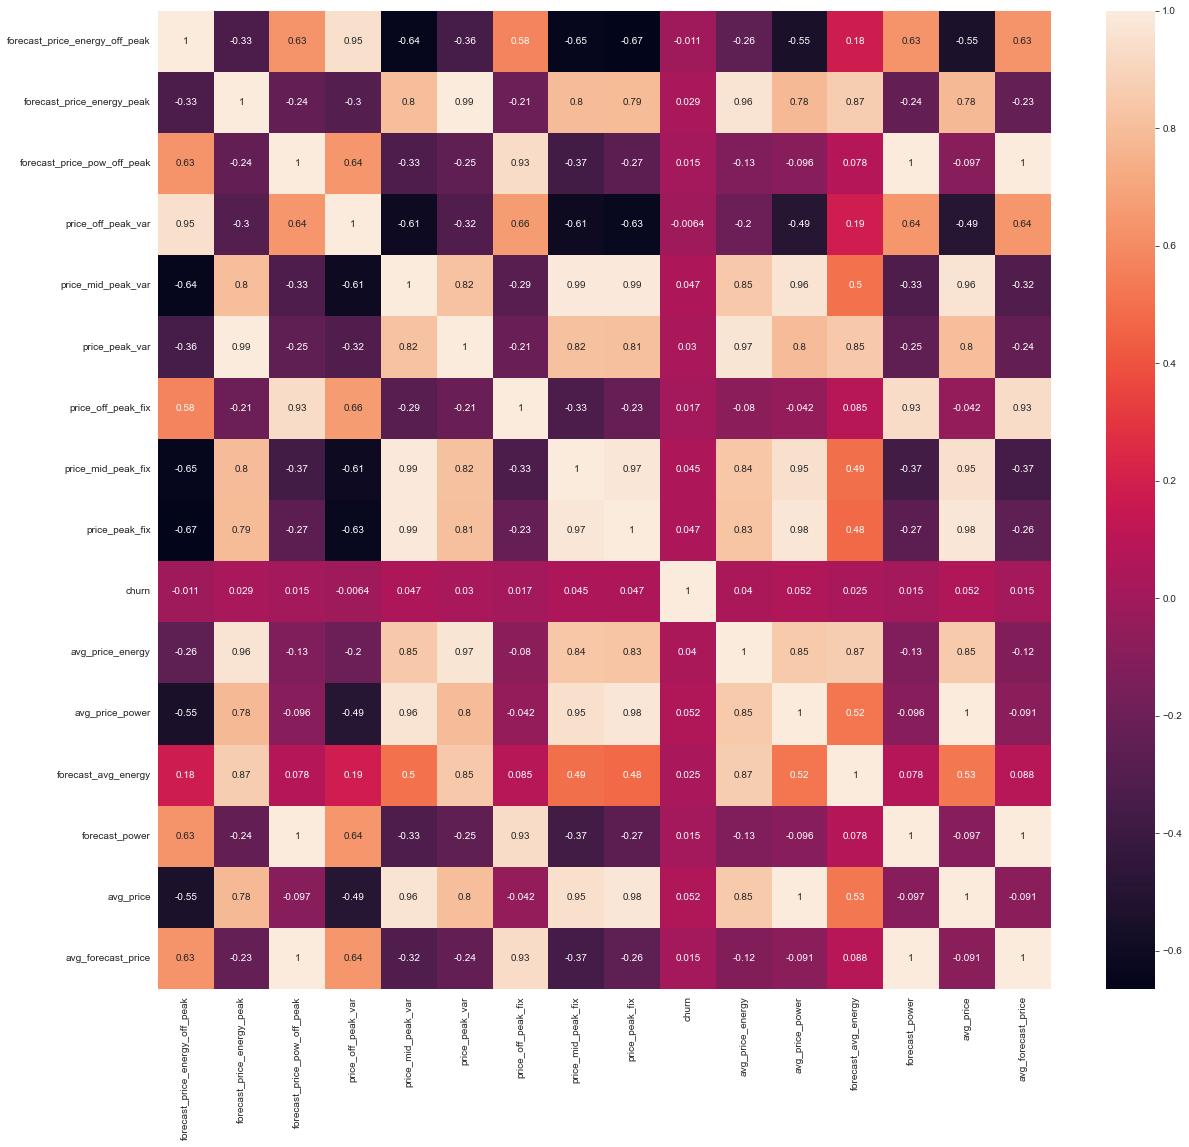

In [65]:
corr1 = merged_df.corr()
# Plot correlation
plt.figure(figsize=(20,18))
sns.heatmap(corr1, xticklabels=corr1.columns.values, yticklabels=corr1.columns.values, annot = True, annot_kws={'size':10})
# Axis ticks size
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [66]:
df.columns

Index(['id', 'channel_sales', 'cons_12m', 'cons_gas_12m', 'cons_last_month',
       'date_activ', 'date_end', 'date_modif_prod', 'date_renewal',
       'forecast_cons_12m', 'forecast_cons_year', 'forecast_discount_energy',
       'forecast_meter_rent_12m', 'forecast_price_energy_off_peak',
       'forecast_price_energy_peak', 'forecast_price_pow_off_peak', 'has_gas',
       'imp_cons', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act',
       'net_margin', 'num_years_antig', 'origin_up', 'pow_max', 'churn',
       'contract_yrs', 'churn_1'],
      dtype='object')

In [67]:
powerco = df.loc[:, ['id','channel_sales', 'cons_12m', 'cons_gas_12m', 'cons_last_month', 'has_gas',
       'imp_cons', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act',
       'net_margin', 'num_years_antig', 'origin_up', 'pow_max','contract_yrs', 'churn',
       ]]
powerco

id                     channel_sales  \
0      24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
1      d29c2c54acc38ff3c0614d0a653813dd                           MISSING   
2      764c75f661154dac3a6c254cd082ea7d  foosdfpfkusacimwkcsosbicdxkicaua   
3      bba03439a292a1e166f80264c16191cb  lmkebamcaaclubfxadlmueccxoimlema   
4      149d57cf92fc41cf94415803a877cb4b                           MISSING   
...                                 ...                               ...   
14601  18463073fb097fc0ac5d3e040f356987  foosdfpfkusacimwkcsosbicdxkicaua   
14602  d0a6f71671571ed83b2645d23af6de00  foosdfpfkusacimwkcsosbicdxkicaua   
14603  10e6828ddd62cbcf687cb74928c4c2d2  foosdfpfkusacimwkcsosbicdxkicaua   
14604  1cf20fd6206d7678d5bcafd28c53b4db  foosdfpfkusacimwkcsosbicdxkicaua   
14605  563dde550fd624d7352f3de77c0cdfcd                           MISSING   

       cons_12m  cons_gas_12m  cons_last_month has_gas  imp_cons  \
0             0         54946                0       t      0.00   
1          4660             0                0       f      0.00   
2           544             0                0       f      0.00   
3          1584             0                0       f      0.00   
4          4425             0              526       f     52.32   
...         ...           ...              ...     ...       ...   
14601     32270         47940                0       t      0.00   
14602      7223             0              181       f     15.94   
14603      1844             0              179       f     18.05   
14604       131             0                0       f      0.00   
14605      8730             0                0       f      0.00   

       margin_gross_pow_ele  margin_net_pow_ele  nb_prod_act  net_margin  \
0                     25.44               25.44            2      678.99   
1                     16.38               16.38            1       18.89   
2                     28.60               28.60            1        6.60   
3                     30.22               30.22            1       25.46   
4                     44.91               44.91            1       47.98   
...                     ...                 ...          ...         ...   
14601                 27.88               27.88            2      381.77   
14602                  0.00                0.00            1       90.34   
14603                 39.84               39.84            1       20.38   
14604                 13.08               13.08            1        0.96   
14605                 11.84               11.84            1       96.34   

       num_years_antig                         origin_up  pow_max  \
0                    3  lxidpiddsbxsbosboudacockeimpuepw   43.648   
1                    6  kamkkxfxxuwbdslkwifmmcsiusiuosws   13.800   
2                    6  kamkkxfxxuwbdslkwifmmcsiusiuosws   13.856   
3                    6  kamkkxfxxuwbdslkwifmmcsiusiuosws   13.200   
4                    6  kamkkxfxxuwbdslkwifmmcsiusiuosws   19.800   
...                ...                               ...      ...   
14601                4  lxidpiddsbxsbosboudacockeimpuepw   15.000   
14602                3  lxidpiddsbxsbosboudacockeimpuepw    6.000   
14603                4  lxidpiddsbxsbosboudacockeimpuepw   15.935   
14604                3  lxidpiddsbxsbosboudacockeimpuepw   11.000   
14605                6  ldkssxwpmemidmecebumciepifcamkci   10.392   

       contract_yrs  churn  
0               3.0      1  
1               7.0      0  
2               6.0      0  
3               6.0      0  
4               6.0      0  
...             ...    ...  
14601           4.0      0  
14602           4.0      1  
14603           4.0      1  
14604           4.0      0  
14605           7.0      0  

[14606 rows x 16 columns]

In [68]:
#converting our boolean values t,f to 0,1
powerco['has_gas'] = np.where(powerco['has_gas'] == 'f',0,1)
powerco

id                     channel_sales  \
0      24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
1      d29c2c54acc38ff3c0614d0a653813dd                           MISSING   
2      764c75f661154dac3a6c254cd082ea7d  foosdfpfkusacimwkcsosbicdxkicaua   
3      bba03439a292a1e166f80264c16191cb  lmkebamcaaclubfxadlmueccxoimlema   
4      149d57cf92fc41cf94415803a877cb4b                           MISSING   
...                                 ...                               ...   
14601  18463073fb097fc0ac5d3e040f356987  foosdfpfkusacimwkcsosbicdxkicaua   
14602  d0a6f71671571ed83b2645d23af6de00  foosdfpfkusacimwkcsosbicdxkicaua   
14603  10e6828ddd62cbcf687cb74928c4c2d2  foosdfpfkusacimwkcsosbicdxkicaua   
14604  1cf20fd6206d7678d5bcafd28c53b4db  foosdfpfkusacimwkcsosbicdxkicaua   
14605  563dde550fd624d7352f3de77c0cdfcd                           MISSING   

       cons_12m  cons_gas_12m  cons_last_month  has_gas  imp_cons  \
0             0         54946                0        1      0.00   
1          4660             0                0        0      0.00   
2           544             0                0        0      0.00   
3          1584             0                0        0      0.00   
4          4425             0              526        0     52.32   
...         ...           ...              ...      ...       ...   
14601     32270         47940                0        1      0.00   
14602      7223             0              181        0     15.94   
14603      1844             0              179        0     18.05   
14604       131             0                0        0      0.00   
14605      8730             0                0        0      0.00   

       margin_gross_pow_ele  margin_net_pow_ele  nb_prod_act  net_margin  \
0                     25.44               25.44            2      678.99   
1                     16.38               16.38            1       18.89   
2                     28.60               28.60            1        6.60   
3                     30.22               30.22            1       25.46   
4                     44.91               44.91            1       47.98   
...                     ...                 ...          ...         ...   
14601                 27.88               27.88            2      381.77   
14602                  0.00                0.00            1       90.34   
14603                 39.84               39.84            1       20.38   
14604                 13.08               13.08            1        0.96   
14605                 11.84               11.84            1       96.34   

       num_years_antig                         origin_up  pow_max  \
0                    3  lxidpiddsbxsbosboudacockeimpuepw   43.648   
1                    6  kamkkxfxxuwbdslkwifmmcsiusiuosws   13.800   
2                    6  kamkkxfxxuwbdslkwifmmcsiusiuosws   13.856   
3                    6  kamkkxfxxuwbdslkwifmmcsiusiuosws   13.200   
4                    6  kamkkxfxxuwbdslkwifmmcsiusiuosws   19.800   
...                ...                               ...      ...   
14601                4  lxidpiddsbxsbosboudacockeimpuepw   15.000   
14602                3  lxidpiddsbxsbosboudacockeimpuepw    6.000   
14603                4  lxidpiddsbxsbosboudacockeimpuepw   15.935   
14604                3  lxidpiddsbxsbosboudacockeimpuepw   11.000   
14605                6  ldkssxwpmemidmecebumciepifcamkci   10.392   

       contract_yrs  churn  
0               3.0      1  
1               7.0      0  
2               6.0      0  
3               6.0      0  
4               6.0      0  
...             ...    ...  
14601           4.0      0  
14602           4.0      1  
14603           4.0      1  
14604           4.0      0  
14605           7.0      0  

[14606 rows x 16 columns]

In [69]:
#saving our dataframe
powerco.to_csv("powerco.csv")
price_features1.to_csv('price_features.csv')